In [7]:
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Kyle\AppData\Roaming\nltk_data...


True

In [15]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kyle\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [1]:
import numpy as np, math
import pandas as pd, sqlite3
import datetime, time, nltk
import matplotlib.pyplot as plt
from nltk import sentiment
import wordcloud, re
from PIL import Image

In [2]:
sid = sentiment.vader.SentimentIntensityAnalyzer()

In [3]:
sentences = ["VADER is smart, handsome, and funny.", # positive sentence example
             "VADER is smart, handsome, and funny!", # punctuation emphasis handled correctly (sentiment intensity adjusted)
             "VADER is very smart, handsome, and funny.",  # booster words handled correctly (sentiment intensity adjusted)
             "VADER is VERY SMART, handsome, and FUNNY.",  # emphasis for ALLCAPS handled
             "VADER is VERY SMART, handsome, and FUNNY!!!",# combination of signals - VADER appropriately adjusts intensity
             "VADER is VERY SMART, really handsome, and INCREDIBLY FUNNY!!!",# booster words & punctuation make this close to ceiling for score
             "The book was good.",         # positive sentence
             "The book was kind of good.", # qualified positive sentence is handled correctly (intensity adjusted)
             "The plot was good, but the characters are uncompelling and the dialog is not great.", # mixed negation sentence
             "A really bad, horrible book.",       # negative sentence with booster words
             "At least it isn't a horrible book.", # negated negative sentence with contraction
             ":) and :D",     # emoticons handled
             "",              # an empty string is correctly handled
             "Today sux",     #  negative slang handled
             "Today sux!",    #  negative slang with punctuation emphasis handled
             "Today SUX!",    #  negative slang with capitalization emphasis
             "Today kinda sux! But I'll get by, lol" # mixed sentiment example with slang and constrastive conjunction "but"
            ]

In [4]:
paragraph = "It was one of the worst movies I've seen, despite good reviews.\
Unbelievably bad acting!! Poor direction. VERY poor production.\
The movie was bad. Very bad movie. VERY bad movie. VERY BAD movie. VERY BAD movie!"

In [5]:
para_lines = nltk.tokenize.sent_tokenize(paragraph)

In [6]:
sentences.extend(para_lines)

In [7]:
sentences

['VADER is smart, handsome, and funny.',
 'VADER is smart, handsome, and funny!',
 'VADER is very smart, handsome, and funny.',
 'VADER is VERY SMART, handsome, and FUNNY.',
 'VADER is VERY SMART, handsome, and FUNNY!!!',
 'VADER is VERY SMART, really handsome, and INCREDIBLY FUNNY!!!',
 'The book was good.',
 'The book was kind of good.',
 'The plot was good, but the characters are uncompelling and the dialog is not great.',
 'A really bad, horrible book.',
 "At least it isn't a horrible book.",
 ':) and :D',
 '',
 'Today sux',
 'Today sux!',
 'Today SUX!',
 "Today kinda sux! But I'll get by, lol",
 "It was one of the worst movies I've seen, despite good reviews.Unbelievably bad acting!!",
 'Poor direction.',
 'VERY poor production.The movie was bad.',
 'Very bad movie.',
 'VERY bad movie.',
 'VERY BAD movie.',
 'VERY BAD movie!']

In [8]:
tricky_sentences = [
    "Most automated sentiment analysis tools are shit.",
    "VADER sentiment analysis is the shit.",
    "Sentiment analysis has never been good.",
    "Sentiment analysis with VADER has never been this good.",
    "Warren Beatty has never been so entertaining.",
    "I won't say that the movie is astounding and I wouldn't claim that \
    the movie is too banal either.",
    "I like to hate Michael Bay films, but I couldn't fault this one",
    "It's one thing to watch an Uwe Boll film, but another thing entirely \
    to pay for it",
    "The movie was too good",
    "This movie was actually neither that funny, nor super witty.",
    "This movie doesn't care about cleverness, wit or any other kind of \
    intelligent humor.",
    "Those who find ugly meanings in beautiful things are corrupt without \
    being charming.",
    "There are slow and repetitive parts, BUT it has just enough spice to \
    keep it interesting.",
    "The script is not fantastic, but the acting is decent and the cinematography \
    is EXCELLENT!",
    "Roger Dodger is one of the most compelling variations on this theme.",
    "Roger Dodger is one of the least compelling variations on this theme.",
    "Roger Dodger is at least compelling as a variation on the theme.",
    "they fall in love with the product",
    "but then it breaks",
    "usually around the time the 90 day warranty expires",
    "the twin towers collapsed today",
    "does this make sense: me losing $88",
    "Crack",
    "Big Crack",
    "Heroine.",
    "Lol",
    "Not my proudest day, gladly i sold off half of my shares last week, so I didn't take that much of a hit, still grateful though.",
    "However, Mr. Carter solemnly argues, his client carried out the kidnapping \
under orders and in the ''least offensive way possible.''",
    "Trim City",
    "Trim Gang",
    "Trimmed Some More"
]

In [9]:
# The 35 Most Popular Comments on the Server
discord_messages = ['Trim gang', 'Trim city', 'Trimmed a few',
       '<@!579205396166737921>', 'Sold half', 'Trimmed some more', 'Nice',
       '👍', 'Trimmed again', 'Trimmed a few more', '@everyone',
       'Sold the rest', 'Lol', 'Trimming a few',
       'Thanks <@!579205396166737921>', '<@456226577798135808>',
       'Baby scalp', 'Let the last one go', 'Trimming some',
       '<@!464449226521313292>', 'Quick scalp', 'Nice!',
       'Trimming some of these', '<@579205396166737921>',
       '<@!385261276986605568>', '🔥', 'Kept 1', 'Cut these in half',
       'Trimmed a couple more', 'Trimming', '<@!623984968921776150>',
       'Another one', '<:elon:743202010131726377>', 'Yessir', 'Thank you']

In [10]:
sentences.extend(discord_messages)

In [11]:
charSenMap = sid.lexicon

In [12]:
maxd = 0
for v in list(charSenMap.values()):
    if v < maxd:
        maxd = v
    else:
        maxd=maxd

In [13]:
charSenMap

{'$:': -1.5,
 '%)': -0.4,
 '%-)': -1.5,
 '&-:': -0.4,
 '&:': -0.7,
 "( '}{' )": 1.6,
 '(%': -0.9,
 "('-:": 2.2,
 "(':": 2.3,
 '((-:': 2.1,
 '(*': 1.1,
 '(-%': -0.7,
 '(-*': 1.3,
 '(-:': 1.6,
 '(-:0': 2.8,
 '(-:<': -0.4,
 '(-:o': 1.5,
 '(-:O': 1.5,
 '(-:{': -0.1,
 '(-:|>*': 1.9,
 '(-;': 1.3,
 '(-;|': 2.1,
 '(8': 2.6,
 '(:': 2.2,
 '(:0': 2.4,
 '(:<': -0.2,
 '(:o': 2.5,
 '(:O': 2.5,
 '(;': 1.1,
 '(;<': 0.3,
 '(=': 2.2,
 '(?:': 2.1,
 '(^:': 1.5,
 '(^;': 1.5,
 '(^;0': 2.0,
 '(^;o': 1.9,
 '(o:': 1.6,
 ")':": -2.0,
 ")-':": -2.1,
 ')-:': -2.1,
 ')-:<': -2.2,
 ')-:{': -2.1,
 '):': -1.8,
 '):<': -1.9,
 '):{': -2.3,
 ');<': -2.6,
 '*)': 0.6,
 '*-)': 0.3,
 '*-:': 2.1,
 '*-;': 2.4,
 '*:': 1.9,
 '*<|:-)': 1.6,
 '*\\0/*': 2.3,
 '*^:': 1.6,
 ',-:': 1.2,
 "---'-;-{@": 2.3,
 '--<--<@': 2.2,
 '.-:': -1.2,
 '..###-:': -1.7,
 '..###:': -1.9,
 '/-:': -1.3,
 '/:': -1.3,
 '/:<': -1.4,
 '/=': -0.9,
 '/^:': -1.0,
 '/o:': -1.4,
 '0-8': 0.1,
 '0-|': -1.2,
 '0:)': 1.9,
 '0:-)': 1.4,
 '0:-3': 1.5,
 '0:03': 1.9,
 '

In [14]:
.701 * 3.4

2.3834

In [15]:
testy = sid.sentiment_valence

In [35]:
for sen in discord_messages:
    print(sen)
    ss = sid.polarity_scores(sen)
    for k in sorted(ss):
        print(f"{k} : {ss[k]}")
    print()

Trim gang
compound : 0.0
neg : 0.0
neu : 1.0
pos : 0.0

Trim city
compound : 0.0
neg : 0.0
neu : 1.0
pos : 0.0

Trimmed a few
compound : 0.0
neg : 0.0
neu : 1.0
pos : 0.0

<@!579205396166737921>
compound : 0.0
neg : 0.0
neu : 1.0
pos : 0.0

Sold half
compound : 0.0
neg : 0.0
neu : 1.0
pos : 0.0

Trimmed some more
compound : 0.0
neg : 0.0
neu : 1.0
pos : 0.0

Nice
compound : 0.4215
neg : 0.0
neu : 0.0
pos : 1.0

👍
compound : 0.0
neg : 0.0
neu : 0.0
pos : 0.0

Trimmed again
compound : 0.0
neg : 0.0
neu : 1.0
pos : 0.0

Trimmed a few more
compound : 0.0
neg : 0.0
neu : 1.0
pos : 0.0

@everyone
compound : 0.0
neg : 0.0
neu : 1.0
pos : 0.0

Sold the rest
compound : 0.0
neg : 0.0
neu : 1.0
pos : 0.0

Lol
compound : 0.4215
neg : 0.0
neu : 0.0
pos : 1.0

Trimming a few
compound : 0.0
neg : 0.0
neu : 1.0
pos : 0.0

Thanks <@!579205396166737921>
compound : 0.4926
neg : 0.0
neu : 0.239
pos : 0.761

<@456226577798135808>
compound : 0.0
neg : 0.0
neu : 1.0
pos : 0.0

Baby scalp
compound : 0.0
neg :

In [16]:
for sen in tricky_sentences:
    print(sen)
    ss = sid.polarity_scores(sen)
    for k in sorted(ss):
        print(f"{k} : {ss[k]}")
    print()

Most automated sentiment analysis tools are shit.
compound : -0.5574
neg : 0.375
neu : 0.625
pos : 0.0

VADER sentiment analysis is the shit.
compound : 0.6124
neg : 0.0
neu : 0.556
pos : 0.444

Sentiment analysis has never been good.
compound : -0.3412
neg : 0.325
neu : 0.675
pos : 0.0

Sentiment analysis with VADER has never been this good.
compound : 0.5228
neg : 0.0
neu : 0.703
pos : 0.297

Warren Beatty has never been so entertaining.
compound : 0.5777
neg : 0.0
neu : 0.616
pos : 0.384

I won't say that the movie is astounding and I wouldn't claim that     the movie is too banal either.
compound : 0.4215
neg : 0.0
neu : 0.851
pos : 0.149

I like to hate Michael Bay films, but I couldn't fault this one
compound : 0.3153
neg : 0.157
neu : 0.534
pos : 0.309

It's one thing to watch an Uwe Boll film, but another thing entirely     to pay for it
compound : -0.2541
neg : 0.112
neu : 0.888
pos : 0.0

The movie was too good
compound : 0.4404
neg : 0.0
neu : 0.58
pos : 0.42

This movie was

<h2 style="color: orange">Discord NLP</h2>

<h4>Table Schema</h4>
<table>
    <thead>
        <th>id</th>
        <th>name</th>
        <th>content</th>
        <th>timestamp</th>
    </thead>
    <tbody>
        <tr>
            <td>
                Numerical Unique Discord ID
            </td>
            <td>
                Discord Username#FourDigits
            </td>
            <td>
                Message content with mentions structured as &lt@id&gt
            </td>
            <td>
                ISO Datetime Stamp GMT
            </td>
    </tbody>

In [17]:
conn = sqlite3.connect("data/text.db")

In [18]:
cur = conn.cursor()

In [19]:
tableName = "text_588270137874841620_588284257491877889"

In [20]:
cur.execute(f"SELECT COUNT(*) from {tableName}")

In [21]:
cur.fetchone()

(38260,)

In [22]:
cur.execute(f"SELECT * from {tableName}")

In [23]:
results = cur.fetchall()

In [24]:
type(results)

list

In [25]:
len(results)

38260

In [26]:
results[0]

('488359813160501251',
 'Merente#5844',
 'Thanks <@464449226521313292> !  I opted for the protection on this which limited my profits but not much.  Still a 30% trade for me!',
 '2020-11-30T20:48:43.035000+00:00')

In [27]:
df = pd.DataFrame(results, columns=["ID", "Name", "Message", "Time"])

In [28]:
df.groupby("ID").count()

Name  Message  Time
ID                                     
107174181992398848   136      136   136
108694387361349632   156      156   156
116366976019988483    11       11    11
119546878445486081    20       20    20
127153644519817216    10       10    10
...                  ...      ...   ...
766345599179423744    10       10    10
767101379457843232     4        4     4
88592858042351616     96       96    96
97244029070082048     10       10    10
98925496229695488      6        6     6

[556 rows x 3 columns]

In [29]:
df.groupby("Message").count().sort_values("Time",ascending=False).head(50).index.values

array(['Trim gang', 'Trim city', 'Trimmed a few',
       '<@!579205396166737921>', 'Sold half', 'Trimmed some more', 'Nice',
       '👍', 'Trimmed again', 'Trimmed a few more', '@everyone',
       'Sold the rest', 'Lol', 'Trimming a few',
       'Thanks <@!579205396166737921>', '<@456226577798135808>',
       'Baby scalp', 'Let the last one go', 'Trimming some',
       '<@!464449226521313292>', 'Quick scalp', 'Nice!',
       'Trimming some of these', '<@579205396166737921>',
       '<@!385261276986605568>', '🔥', 'Kept 1', 'Cut these in half',
       'Trimmed a couple more', 'Trimming', '<@!623984968921776150>',
       'Another one', '<:elon:743202010131726377>', 'Yessir', 'Thank you',
       'Dropped another one', 'Thanks <@579205396166737921> !',
       'Scalp city', 'Move to free chat', 'Quick Tesla scalp',
       'Trimmed 5 more', 'Quick day trade',
       'Thanks <@!300836254457659392>', 'Quick little SPY scalp', '😉',
       'ok', 'Trim game', 'nice', 'My small account', 'Keeping 1'

In [30]:
# Unique Messages
df.groupby("Message").count().shape

(4812, 3)

In [31]:
# Unique Users
df.groupby("ID").count().shape

(556, 3)

In [32]:
df.dtypes

ID         object
Name       object
Message    object
Time       object
dtype: object

In [33]:
df.head(20)

ID              Name  \
0   488359813160501251      Merente#5844   
1   689681229989150742    jackaplan#7289   
2   612337363326074936    Trademate#2515   
3   488359813160501251      Merente#5844   
4   689681229989150742    jackaplan#7289   
5   131952052069728258       Teecee#3022   
6   612337363326074936    Trademate#2515   
7   488359813160501251      Merente#5844   
8   689681229989150742    jackaplan#7289   
9   464449226521313292  TradingJEDI#2647   
10  131952052069728258       Teecee#3022   
11  612337363326074936    Trademate#2515   
12  488359813160501251      Merente#5844   
13  399198468159045633    AjKilgore#0424   
14  464449226521313292  TradingJEDI#2647   
15  131952052069728258       Teecee#3022   
16  612337363326074936    Trademate#2515   
17  612337363326074936    Trademate#2515   
18  399198468159045633    AjKilgore#0424   
19  464449226521313292  TradingJEDI#2647   

                                              Message  \
0   Thanks <@464449226521313292> !  I opted for th...   
1   Barely followed the market at all today (didn’...   
2     <@131952052069728258> has reached level **13**!   
3   Thanks <@464449226521313292> !  I opted for th...   
4   Barely followed the market at all today (didn’...   
5                  <@!464449226521313292> thanks boss   
6     <@131952052069728258> has reached level **13**!   
7   Thanks <@464449226521313292> !  I opted for th...   
8   Barely followed the market at all today (didn’...   
9   <@!399198468159045633> BRO AWSOME SO GLAD YOU ...   
10                 <@!464449226521313292> thanks boss   
11    <@131952052069728258> has reached level **13**!   
12  Thanks <@464449226521313292> !  I opted for th...   
13  <@!464449226521313292>  might have sold a bit ...   
14  <@!399198468159045633> BRO AWSOME SO GLAD YOU ...   
15                 <@!464449226521313292> thanks boss   
16    <@131952052069728258> has reached level **13**!   
17     <@754861361896357958> has reached level **2**!   
18  <@!464449226521313292>  might have sold a bit ...   
19  <@!399198468159045633> BRO AWSOME SO GLAD YOU ...   

                                Time  
0   2020-11-30T20:48:43.035000+00:00  
1   2020-11-30T20:58:32.872000+00:00  
2   2020-11-30T19:55:20.913000+00:00  
3   2020-11-30T20:48:43.035000+00:00  
4   2020-11-30T20:58:32.872000+00:00  
5   2020-11-30T19:55:20.625000+00:00  
6   2020-11-30T19:55:20.913000+00:00  
7   2020-11-30T20:48:43.035000+00:00  
8   2020-11-30T20:58:32.872000+00:00  
9   2020-11-30T19:44:26.516000+00:00  
10  2020-11-30T19:55:20.625000+00:00  
11  2020-11-30T19:55:20.913000+00:00  
12  2020-11-30T20:48:43.035000+00:00  
13  2020-11-30T19:30:11.004000+00:00  
14  2020-11-30T19:44:26.516000+00:00  
15  2020-11-30T19:55:20.625000+00:00  
16  2020-11-30T19:55:20.913000+00:00  
17  2020-11-30T18:37:48.905000+00:00  
18  2020-11-30T19:30:11.004000+00:00  
19  2020-11-30T19:44:26.516000+00:00

In [34]:
conn.close()

In [35]:
df_new = df.copy(deep=True)

In [36]:
df_new = df_new.assign(Datetime = lambda x: x.Time.apply(datetime.datetime.fromisoformat))

In [37]:
df_new2 = df_new.copy(deep=True)

In [38]:
df_new2 = df_new2.assign(Date = lambda x: x.Datetime.apply(datetime.datetime.date))
df_new2 = df_new2.assign(Time = lambda x: x.Datetime.apply(datetime.datetime.time))
df_new2 = df_new2.assign(UnixTimeStamp = lambda x: x.Datetime.apply(datetime.datetime.timestamp))

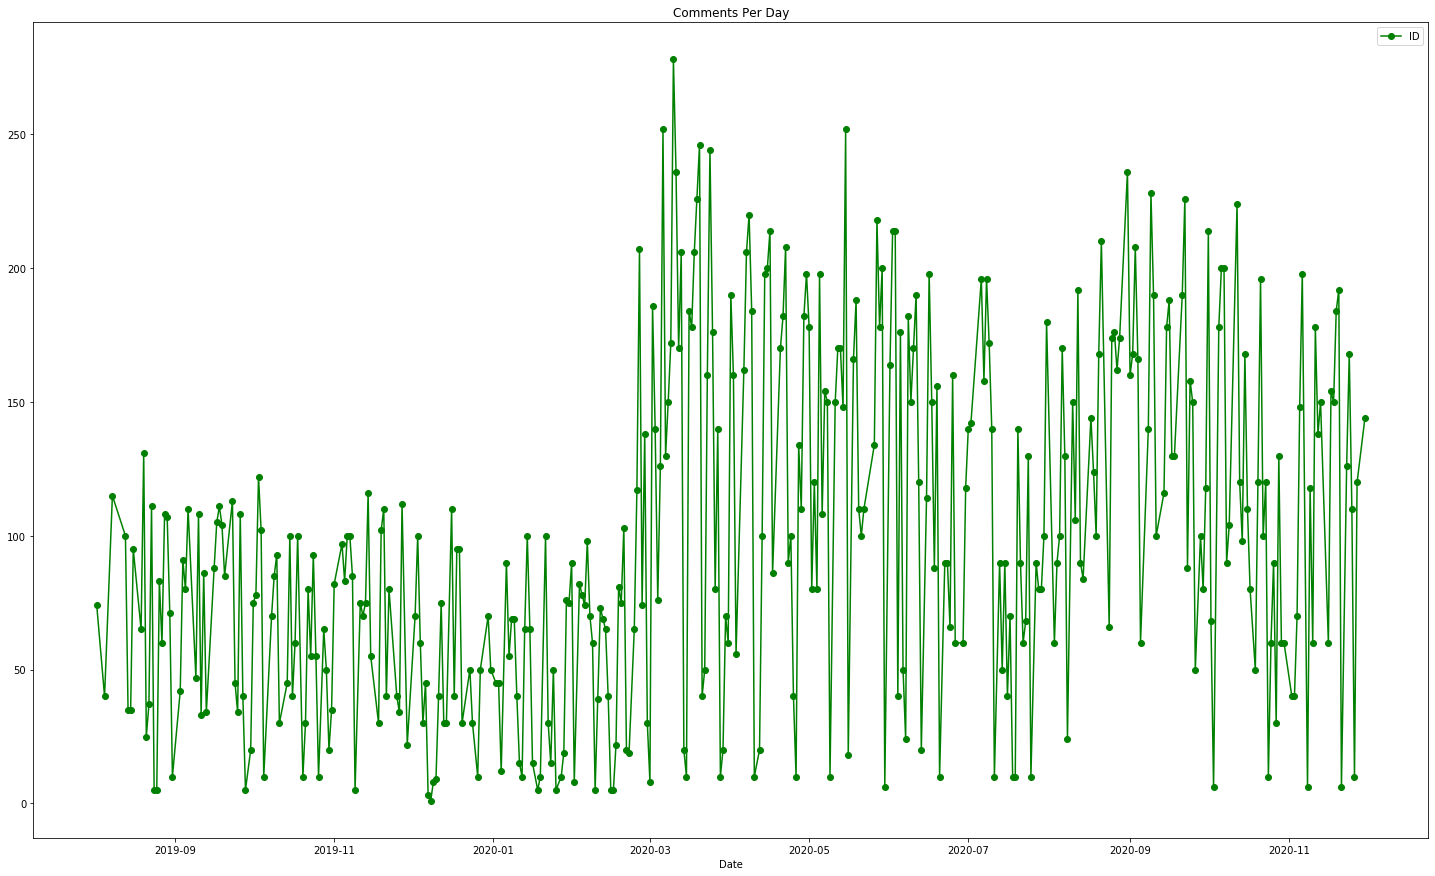

In [39]:
df_new2.groupby("Date").count().plot(kind="line", use_index=True, y="ID", style="go-", figsize=(25, 15), title="Comments Per Day")

In [40]:
df.Message.value_counts().head(50)

Trim gang                        280
Trim city                        208
Trimmed a few                     80
<@!579205396166737921>            79
Sold half                         71
Trimmed some more                 70
Nice                              65
👍                                 56
Trimmed again                     50
Trimmed a few more                50
@everyone                         43
Lol                               40
Sold the rest                     40
Trimming a few                    40
Thanks <@!579205396166737921>     38
<@456226577798135808>             37
Let the last one go               36
Baby scalp                        36
Trimming some                     34
<@!464449226521313292>            33
Quick scalp                       33
Nice!                             31
<@!385261276986605568>            30
Trimming some of these            30
<@579205396166737921>             30
🔥                                 28
Kept 1                            28
C

In [41]:
df_new2.dtypes

ID                            object
Name                          object
Message                       object
Time                          object
Datetime         datetime64[ns, UTC]
Date                          object
UnixTimeStamp                float64
dtype: object

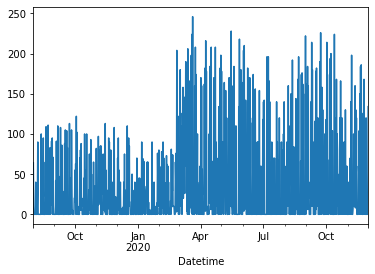

In [42]:
df_new2.set_index('Datetime').groupby(pd.Grouper(freq="12H")).count().ID.plot()

In [43]:
def hours(h):
    return h.hour

In [44]:
def easternize(dt):
    return dt.tz_convert("est")

In [45]:
def day(dt):
    return dt.dayofweek

In [46]:
df_new2 = df_new2.assign(EasternDT = lambda x: x.Datetime.apply(easternize))

Text(0.5, 1.0, 'Distribution of Comments by Hour')

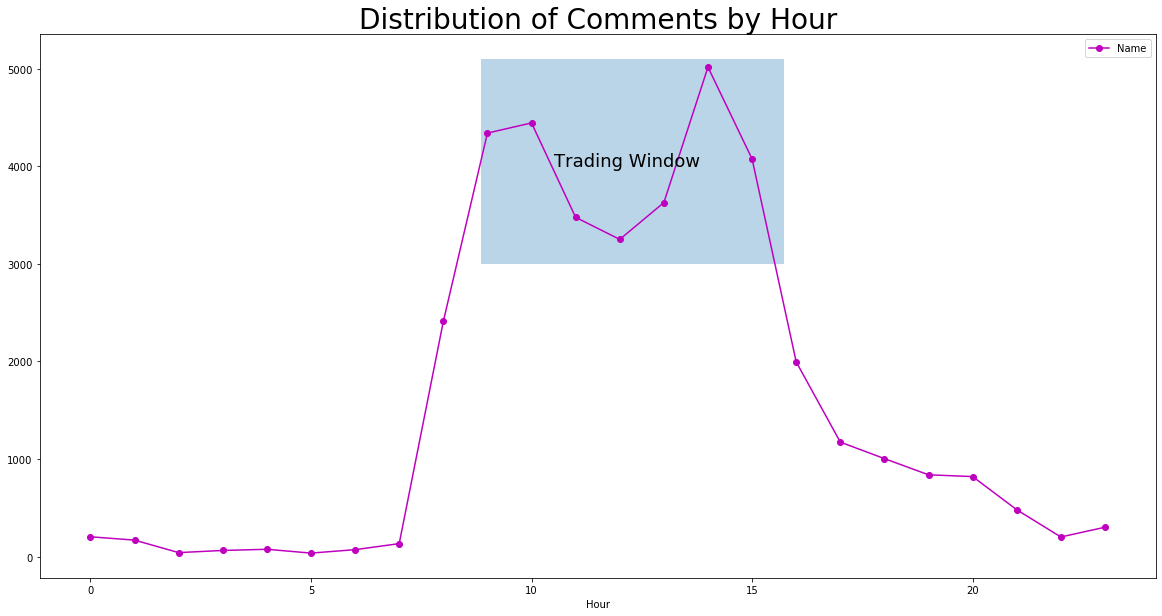

In [47]:
ax = df_new2.assign(Hour = lambda x: x.EasternDT.apply(hours)).groupby("Hour").count().plot(use_index=True, y="Name", style="mo-", figsize=(20, 10))
ax.axhspan(3000, 5100, alpha=0.3, xmin=(9.5/24), xmax=(16/24))
plt.annotate("Trading Window", (10.5, 4000), fontsize=18)
plt.title(label="Distribution of Comments by Hour", fontsize=28)

Text(0.5, 1.02, 'Amount of Comments by Day of Week')

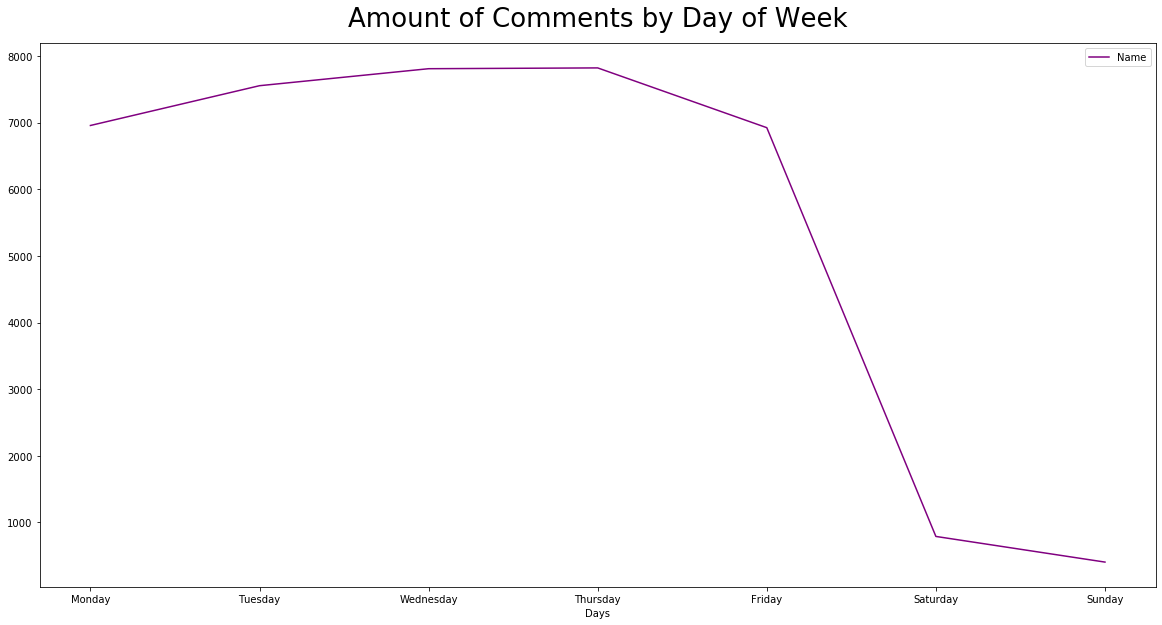

In [48]:
ax = df_new2.assign(Days = lambda x: x.EasternDT.apply(day)).groupby("Days").count().plot(use_index=True, y="Name", style="purple", figsize=(20, 10))
ax.set_xticklabels(["", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title(label="Amount of Comments by Day of Week", fontsize=26, y=1.02)

<h1>Discord Word Cloud</h1>

In [49]:
import wordcloud, re

In [50]:
from PIL import Image

In [51]:
df_wc = df_new2.copy(deep=True)

In [52]:
df_wc.head(10)

ID              Name  \
0  488359813160501251      Merente#5844   
1  689681229989150742    jackaplan#7289   
2  612337363326074936    Trademate#2515   
3  488359813160501251      Merente#5844   
4  689681229989150742    jackaplan#7289   
5  131952052069728258       Teecee#3022   
6  612337363326074936    Trademate#2515   
7  488359813160501251      Merente#5844   
8  689681229989150742    jackaplan#7289   
9  464449226521313292  TradingJEDI#2647   

                                             Message             Time  \
0  Thanks <@464449226521313292> !  I opted for th...  20:48:43.035000   
1  Barely followed the market at all today (didn’...  20:58:32.872000   
2    <@131952052069728258> has reached level **13**!  19:55:20.913000   
3  Thanks <@464449226521313292> !  I opted for th...  20:48:43.035000   
4  Barely followed the market at all today (didn’...  20:58:32.872000   
5                 <@!464449226521313292> thanks boss  19:55:20.625000   
6    <@131952052069728258> has reached level **13**!  19:55:20.913000   
7  Thanks <@464449226521313292> !  I opted for th...  20:48:43.035000   
8  Barely followed the market at all today (didn’...  20:58:32.872000   
9  <@!399198468159045633> BRO AWSOME SO GLAD YOU ...  19:44:26.516000   

                          Datetime        Date  UnixTimeStamp  \
0 2020-11-30 20:48:43.035000+00:00  2020-11-30   1.606769e+09   
1 2020-11-30 20:58:32.872000+00:00  2020-11-30   1.606770e+09   
2 2020-11-30 19:55:20.913000+00:00  2020-11-30   1.606766e+09   
3 2020-11-30 20:48:43.035000+00:00  2020-11-30   1.606769e+09   
4 2020-11-30 20:58:32.872000+00:00  2020-11-30   1.606770e+09   
5 2020-11-30 19:55:20.625000+00:00  2020-11-30   1.606766e+09   
6 2020-11-30 19:55:20.913000+00:00  2020-11-30   1.606766e+09   
7 2020-11-30 20:48:43.035000+00:00  2020-11-30   1.606769e+09   
8 2020-11-30 20:58:32.872000+00:00  2020-11-30   1.606770e+09   
9 2020-11-30 19:44:26.516000+00:00  2020-11-30   1.606765e+09   

                         EasternDT  
0 2020-11-30 15:48:43.035000-05:00  
1 2020-11-30 15:58:32.872000-05:00  
2 2020-11-30 14:55:20.913000-05:00  
3 2020-11-30 15:48:43.035000-05:00  
4 2020-11-30 15:58:32.872000-05:00  
5 2020-11-30 14:55:20.625000-05:00  
6 2020-11-30 14:55:20.913000-05:00  
7 2020-11-30 15:48:43.035000-05:00  
8 2020-11-30 15:58:32.872000-05:00  
9 2020-11-30 14:44:26.516000-05:00

In [53]:
df_wc= df_wc.drop_duplicates()

In [54]:
df_wc.shape

(5081, 8)

In [55]:
df_wc.head(10)

ID              Name  \
0   488359813160501251      Merente#5844   
1   689681229989150742    jackaplan#7289   
2   612337363326074936    Trademate#2515   
5   131952052069728258       Teecee#3022   
9   464449226521313292  TradingJEDI#2647   
13  399198468159045633    AjKilgore#0424   
17  612337363326074936    Trademate#2515   
22  754861361896357958      Gbdavis#9509   
36  726683522839871498      Don J ♠#1980   
38  702961272689524767      aalisub#9254   

                                              Message             Time  \
0   Thanks <@464449226521313292> !  I opted for th...  20:48:43.035000   
1   Barely followed the market at all today (didn’...  20:58:32.872000   
2     <@131952052069728258> has reached level **13**!  19:55:20.913000   
5                  <@!464449226521313292> thanks boss  19:55:20.625000   
9   <@!399198468159045633> BRO AWSOME SO GLAD YOU ...  19:44:26.516000   
13  <@!464449226521313292>  might have sold a bit ...  19:30:11.004000   
17     <@754861361896357958> has reached level **2**!  18:37:48.905000   
22  Just sold this.. fantastic call. Thank you <@!...  18:37:48.635000   
36     10 min trade. Thank you <@!579205396166737921>  15:19:45.580000   
38            <@!579205396166737921> padding my stats  15:16:18.906000   

                           Datetime        Date  UnixTimeStamp  \
0  2020-11-30 20:48:43.035000+00:00  2020-11-30   1.606769e+09   
1  2020-11-30 20:58:32.872000+00:00  2020-11-30   1.606770e+09   
2  2020-11-30 19:55:20.913000+00:00  2020-11-30   1.606766e+09   
5  2020-11-30 19:55:20.625000+00:00  2020-11-30   1.606766e+09   
9  2020-11-30 19:44:26.516000+00:00  2020-11-30   1.606765e+09   
13 2020-11-30 19:30:11.004000+00:00  2020-11-30   1.606765e+09   
17 2020-11-30 18:37:48.905000+00:00  2020-11-30   1.606761e+09   
22 2020-11-30 18:37:48.635000+00:00  2020-11-30   1.606761e+09   
36 2020-11-30 15:19:45.580000+00:00  2020-11-30   1.606750e+09   
38 2020-11-30 15:16:18.906000+00:00  2020-11-30   1.606749e+09   

                          EasternDT  
0  2020-11-30 15:48:43.035000-05:00  
1  2020-11-30 15:58:32.872000-05:00  
2  2020-11-30 14:55:20.913000-05:00  
5  2020-11-30 14:55:20.625000-05:00  
9  2020-11-30 14:44:26.516000-05:00  
13 2020-11-30 14:30:11.004000-05:00  
17 2020-11-30 13:37:48.905000-05:00  
22 2020-11-30 13:37:48.635000-05:00  
36 2020-11-30 10:19:45.580000-05:00  
38 2020-11-30 10:16:18.906000-05:00

In [56]:
df_wc.Message[2]

'<@131952052069728258> has reached level **13**!'

In [57]:
regex = re.compile(r"<.*>")

In [58]:
wordy = {}

In [59]:
regex.search("<@131952052069728258> has reached level **13**!")[0]

'<@131952052069728258>'

In [60]:
def userMentions(comment):
    mention = regex.search(comment)
    if mention != None:
        stripped_comment = comment.replace(mention[0], "")
        stripped_comment = stripped_comment.strip()
        words = stripped_comment.split(" ")
    else:
        words = comment.strip().split(" ")
    
    for word in words:
        word = word.lower()
        if word not in wordy.keys():
            wordy[word] = 1
        else:
            wordy[word] += 1

In [61]:
df_wc

ID                            Name  \
0      488359813160501251                    Merente#5844   
1      689681229989150742                  jackaplan#7289   
2      612337363326074936                  Trademate#2515   
5      131952052069728258                     Teecee#3022   
9      464449226521313292                TradingJEDI#2647   
...                   ...                             ...   
38226  445583268792893449                itsyoboyvic#7198   
38231  445583268792893449                itsyoboyvic#7198   
38236  579205396166737921  beenpippinsincebeenpippin#4039   
38245  385261276986605568                   Sporadic#0001   
38249  579205396166737921  beenpippinsincebeenpippin#4039   

                                                 Message             Time  \
0      Thanks <@464449226521313292> !  I opted for th...  20:48:43.035000   
1      Barely followed the market at all today (didn’...  20:58:32.872000   
2        <@131952052069728258> has reached level **13**!  19:55:20.913000   
5                     <@!464449226521313292> thanks boss  19:55:20.625000   
9      <@!399198468159045633> BRO AWSOME SO GLAD YOU ...  19:44:26.516000   
...                                                  ...              ...   
38226                                          Big crack  01:14:39.682000   
38231                                              Crack  01:14:35.798000   
38236  @everyone today’s total. This doesn’t calculat...  01:13:47.923000   
38245                                          @everyone  01:11:08.694000   
38249                                 Play account today  01:10:52.637000   

                              Datetime        Date  UnixTimeStamp  \
0     2020-11-30 20:48:43.035000+00:00  2020-11-30   1.606769e+09   
1     2020-11-30 20:58:32.872000+00:00  2020-11-30   1.606770e+09   
2     2020-11-30 19:55:20.913000+00:00  2020-11-30   1.606766e+09   
5     2020-11-30 19:55:20.625000+00:00  2020-11-30   1.606766e+09   
9     2020-11-30 19:44:26.516000+00:00  2020-11-30   1.606765e+09   
...                                ...         ...            ...   
38226 2019-08-02 01:14:39.682000+00:00  2019-08-02   1.564708e+09   
38231 2019-08-02 01:14:35.798000+00:00  2019-08-02   1.564708e+09   
38236 2019-08-02 01:13:47.923000+00:00  2019-08-02   1.564708e+09   
38245 2019-08-02 01:11:08.694000+00:00  2019-08-02   1.564708e+09   
38249 2019-08-02 01:10:52.637000+00:00  2019-08-02   1.564708e+09   

                             EasternDT  
0     2020-11-30 15:48:43.035000-05:00  
1     2020-11-30 15:58:32.872000-05:00  
2     2020-11-30 14:55:20.913000-05:00  
5     2020-11-30 14:55:20.625000-05:00  
9     2020-11-30 14:44:26.516000-05:00  
...                                ...  
38226 2019-08-01 20:14:39.682000-05:00  
38231 2019-08-01 20:14:35.798000-05:00  
38236 2019-08-01 20:13:47.923000-05:00  
38245 2019-08-01 20:11:08.694000-05:00  
38249 2019-08-01 20:10:52.637000-05:00  

[5081 rows x 8 columns]

In [62]:
cl = []

In [63]:
df_new2.Message.apply(userMentions)

0        None
1        None
2        None
3        None
4        None
         ... 
38255    None
38256    None
38257    None
38258    None
38259    None
Name: Message, Length: 38260, dtype: object

In [64]:
wordy

{'thanks': 2023,
 '': 12084,
 '!': 334,
 'i': 5622,
 'opted': 8,
 'for': 4393,
 'the': 8771,
 'protection': 114,
 'on': 4089,
 'this': 2945,
 'which': 94,
 'limited': 21,
 'my': 3140,
 'profits': 907,
 'but': 2337,
 'not': 933,
 'much.': 8,
 'still': 1017,
 'a': 6203,
 '30%': 60,
 'trade': 1352,
 'me!': 18,
 'barely': 26,
 'followed': 56,
 'market': 330,
 'at': 1802,
 'all': 1036,
 'today': 1265,
 '(didn’t': 6,
 'like': 762,
 'price': 156,
 'action)': 6,
 'i’ll': 305,
 'take': 740,
 '$160': 6,
 'any': 165,
 'day': 2310,
 'has': 1301,
 'reached': 1124,
 'level': 1237,
 '**13**!': 40,
 'boss': 50,
 'bro': 151,
 'awsome': 10,
 'so': 1244,
 'glad': 65,
 'you': 2992,
 'are': 729,
 'in': 3659,
 'it': 2987,
 'with': 1759,
 'me': 1184,
 'might': 147,
 'have': 1159,
 'sold': 1718,
 'bit': 220,
 'soon': 90,
 'profit': 1174,
 'is': 2250,
 '**2**!': 98,
 'just': 1463,
 'this..': 20,
 'fantastic': 10,
 'call.': 76,
 'thank': 641,
 '10': 249,
 'min': 141,
 'trade.': 212,
 'padding': 10,
 'stats': 10

In [504]:
for k in wordy.keys():
    newst = k
    for x in range(wordy[k]):
        cl.append(newst)

In [505]:
with open("words3.txt", "w") as file:
    for x in cl:
        try:
            newX = x + " "
            file.write(newX)
        except UnicodeEncodeError:
            next
    file.close()

In [65]:
lines = []
with open('words3.txt','r',buffering=100000) as f:
    for line in f:
        lines.append(line)

In [66]:
cloudy = " ".join(line for line in lines)

In [67]:
val = list(wordy.keys())
number = list(wordy.values())

In [68]:
words = {"Values": val,
        "Instances": number}

In [69]:
cloudy_words = pd.DataFrame(words)

In [70]:
cloudy_words=cloudy_words.sort_values("Instances", ascending=False)

In [71]:
cloudy_words.head(50).Values.values

array(['', 'the', 'to', 'a', 'i', 'and', 'for', 'on', 'in', 'of', 'my',
       'you', 'it', 'this', 'but', 'day', 'from', 'is', 'thanks', 'out',
       'one', 'at', 'with', 'sold', 'was', 'trimmed', 'that', 'some',
       'up', 'more', 'just', 'trade', 'quick', 'these', 'has', 'today',
       'so', 'level', 'me', 'profit', 'got', 'have', 'reached', 'good',
       'trim', 'had', 'call', 'last', 'all', 'still'], dtype=object)

In [72]:
stop_words = set(['', 'the', 'to', 'a', 'i', 'and', 'for', 'on', 'in', 'of', 'it',
       'you', 'this', 'my', 'is', 'but', 'from', 'day', 'out', 'with',
       'at', 'one', 'was', 'that', 'some', 'these', 'have', 'me',
       'has', 'so', 'just', 'call', 'all', 'get', '2', "thanks", "not", "be", "will", "too", "if","been", "what", "still", "more"
                 "by", "when", "are", "was", "were", "had", "have", "your", "can"])

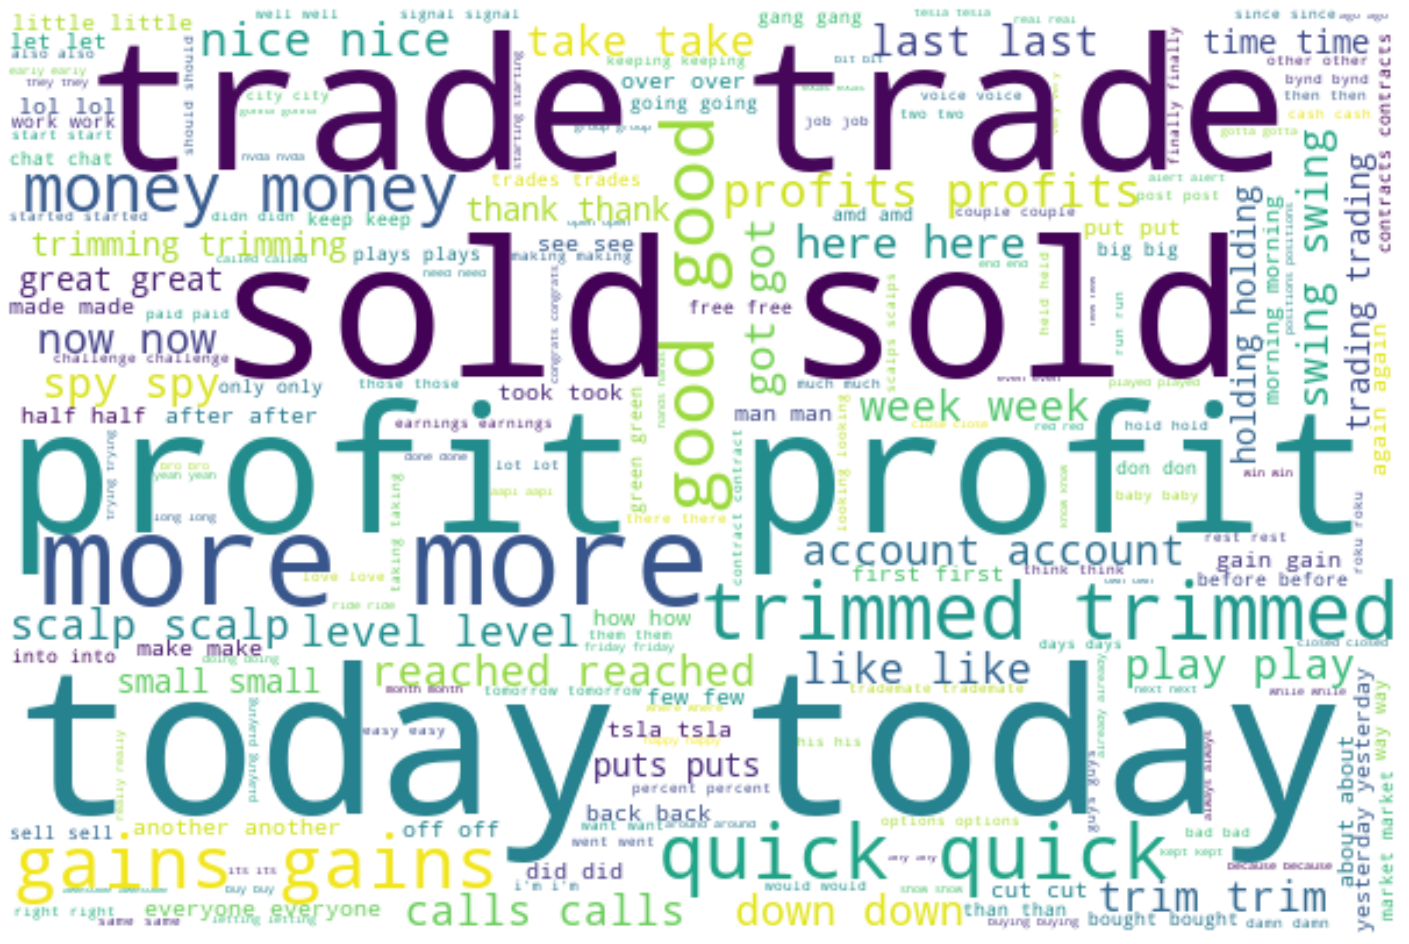

In [73]:
wordcloud2 = wordcloud.WordCloud(width=600, height=400, min_word_length=3, stopwords=stop_words, background_color="white").generate(cloudy)
plt.figure(figsize=(25, 20))
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.show()

In [74]:
new_c = {}
for v, num in zip(val, number):
    if v in stop_words:
        next
    else:
        new_c[v] = num

In [82]:
mask = np.array(Image.open("photos/wordcloud/Picture1.jpg"))

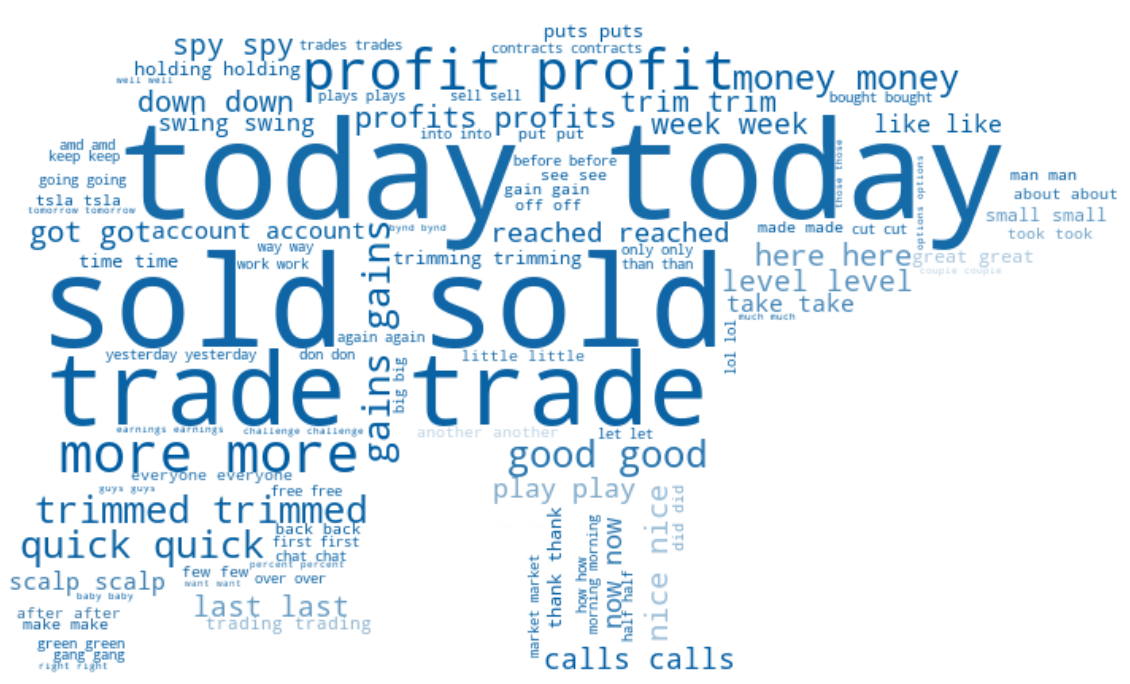

In [83]:
# Bear Word Cloud - Once comments can be correctly classified we can create this image again with negative comments.
wordcloud3 = wordcloud.WordCloud(width=600, height=400, min_word_length=3, max_words=100, stopwords=stop_words, mode="RGBA", background_color="white", mask=mask).generate(cloudy)
image_colors = wordcloud.ImageColorGenerator(mask)
plt.figure(figsize=(20, 16))
plt.imshow(wordcloud3.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

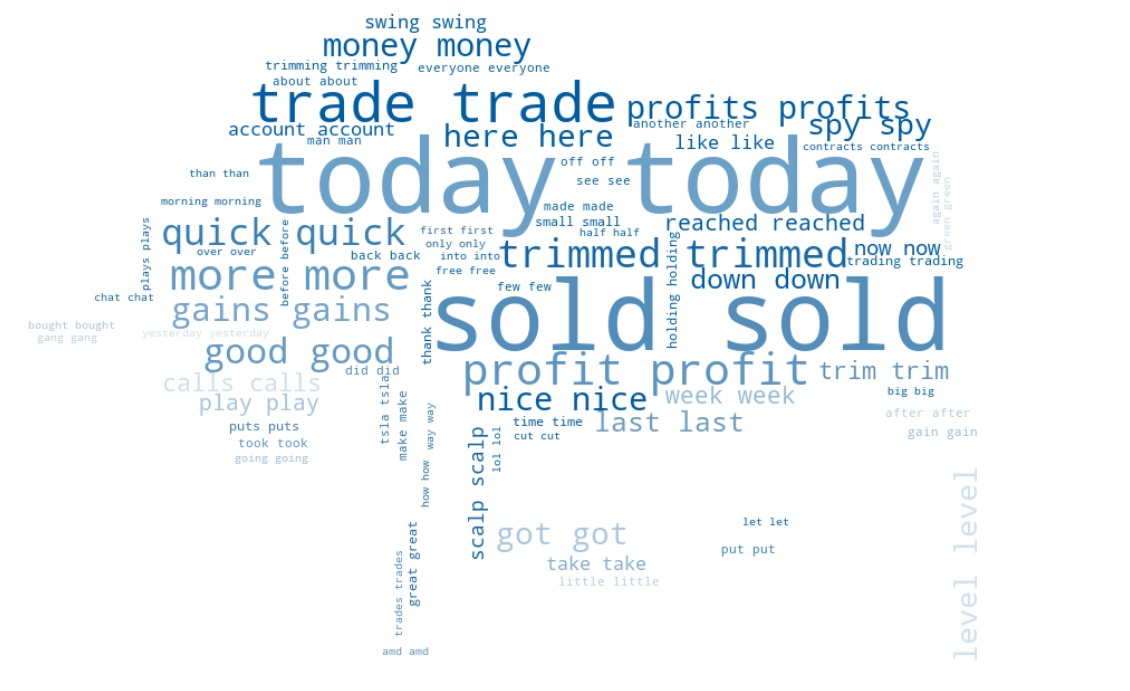

In [84]:
# Bull Word Cloud - Once comments can be correctly classified we can create this image again with positive comments.
mask = np.array(Image.open("photos/wordcloud/Picture2.jpg"))
wordcloud4 = wordcloud.WordCloud(width=600, height=400, min_word_length=3, max_words=80, stopwords=stop_words, mode="RGBA", background_color="white", mask=mask).generate(cloudy)
image_colors = wordcloud.ImageColorGenerator(mask)
plt.figure(figsize=(20, 16))
plt.imshow(wordcloud4.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

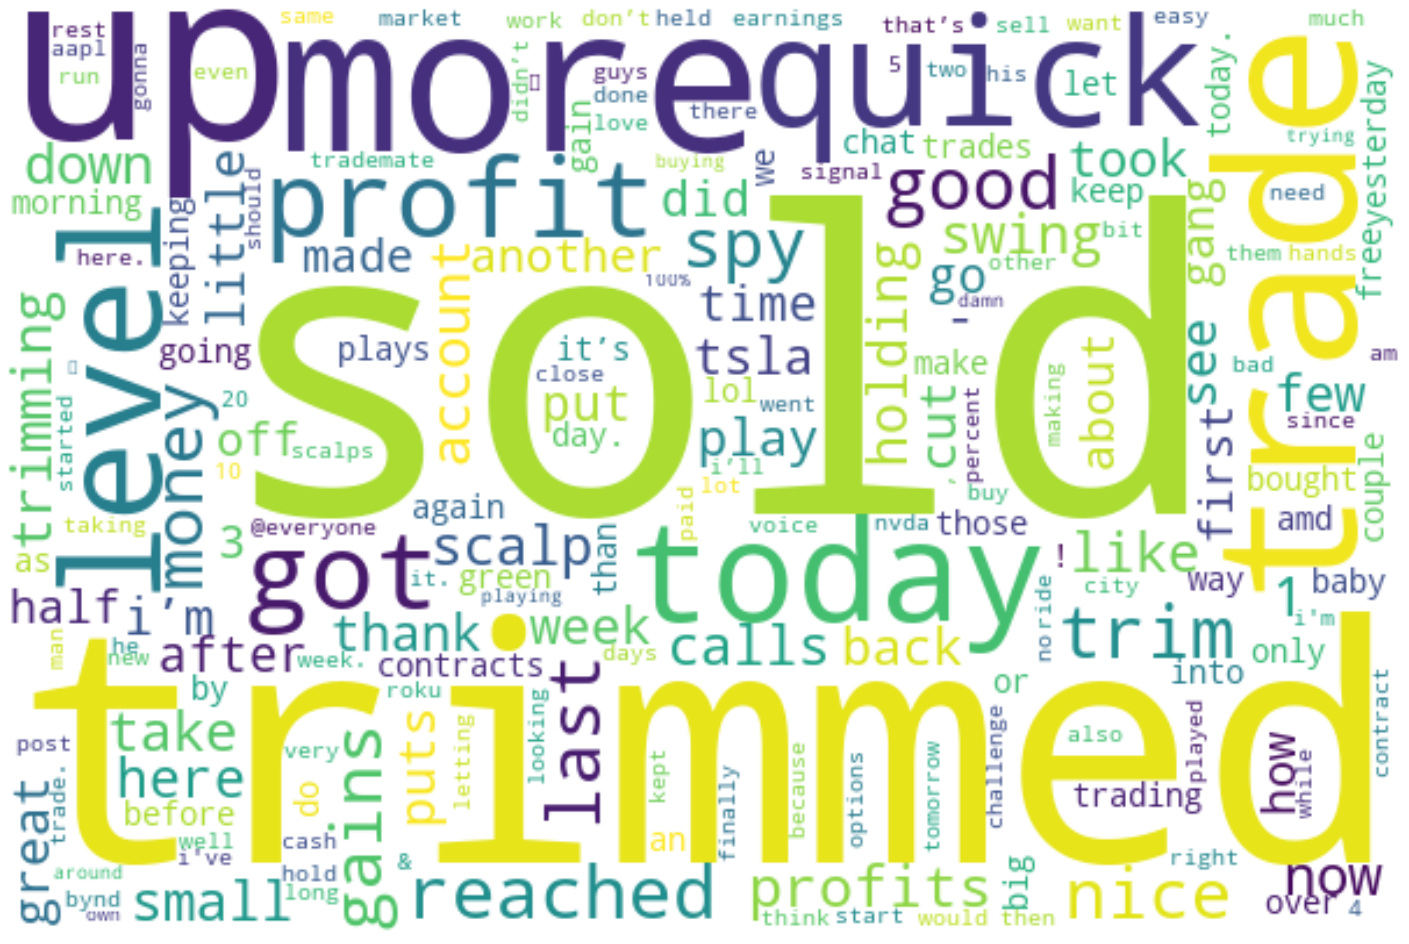

In [79]:
# Removing duplicates, classifying words size by frequency
wordcloud2 = wordcloud.WordCloud(width=600, height=400, min_word_length=3, stopwords=stop_words, background_color="white").generate_from_frequencies(new_c)
plt.figure(figsize=(25, 20))
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.show()

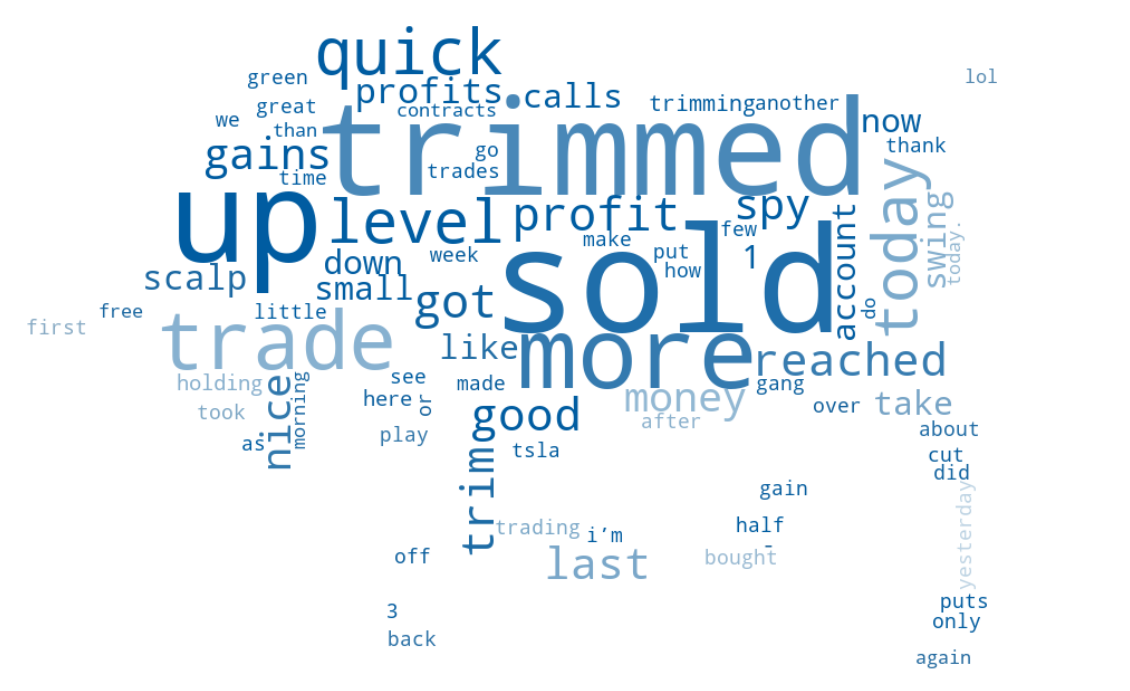

In [85]:
# Removing duplicates, classifying words size by frequency (bull image mask)
mask = np.array(Image.open("photos/wordcloud/Picture2.jpg"))
wordcloud4 = wordcloud.WordCloud(width=600, height=400, min_word_length=3, max_words=80, stopwords=stop_words, mode="RGBA", background_color="white", mask=mask).generate_from_frequencies(new_c)
image_colors = wordcloud.ImageColorGenerator(mask)
plt.figure(figsize=(20, 16))
plt.imshow(wordcloud4.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

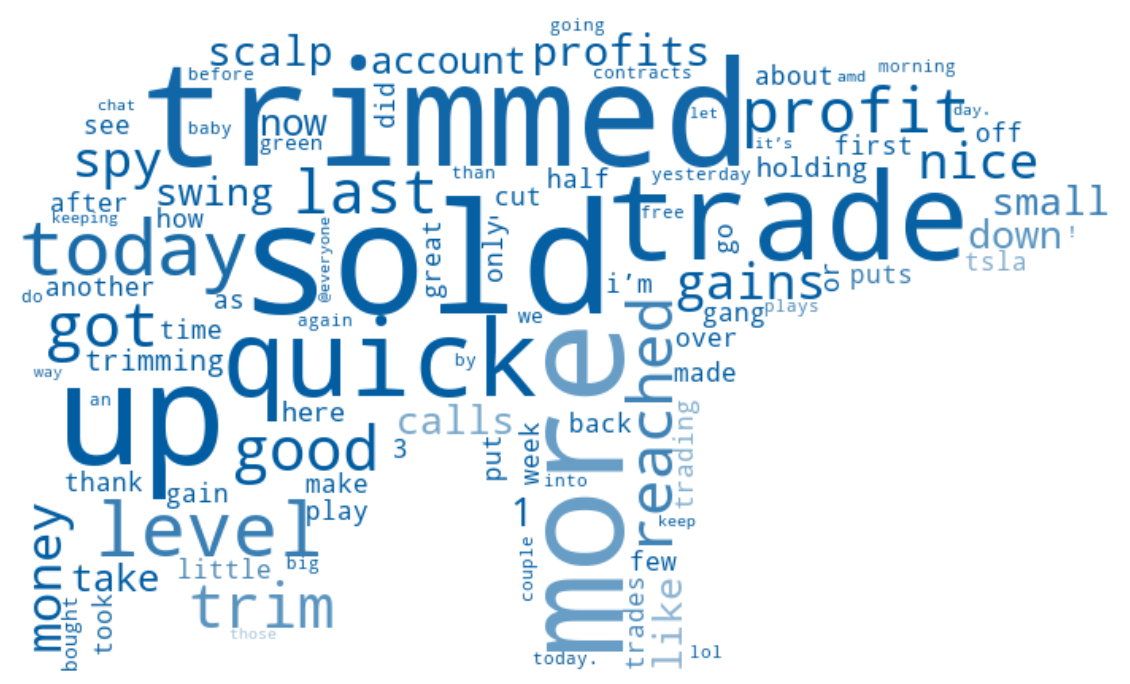

In [86]:
mask = np.array(Image.open("photos/wordcloud/Picture1.jpg"))
wordcloud3 = wordcloud.WordCloud(width=600, height=400, min_word_length=3, max_words=100, stopwords=stop_words, mode="RGBA", background_color="white", mask=mask).generate_from_frequencies(new_c)
image_colors = wordcloud.ImageColorGenerator(mask)
plt.figure(figsize=(20, 16))
plt.imshow(wordcloud3.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

In [87]:
messages = list(df_wc.Message.values)

In [88]:
messages[:10]

['Thanks <@464449226521313292> !  I opted for the protection on this which limited my profits but not much.  Still a 30% trade for me!',
 'Barely followed the market at all today (didn’t like the price action) but I’ll take $160 any day',
 '<@131952052069728258> has reached level **13**!',
 '<@!464449226521313292> thanks boss',
 '<@!399198468159045633> BRO AWSOME SO GLAD YOU ARE IN IT WITH ME',
 '<@!464449226521313292>  might have sold a bit soon but profit is profit',
 '<@754861361896357958> has reached level **2**!',
 'Just sold this.. fantastic call. Thank you <@!579205396166737921>',
 '10 min trade. Thank you <@!579205396166737921>',
 '<@!579205396166737921> padding my stats']

In [89]:
# Bot congrats
botCom = re.compile("\shas reached level \*\*.\d+\*\*")

In [90]:
botCom.search("<@131952052069728258> has reached level **13**!")

<re.Match object; span=(21, 46), match=' has reached level **13**'>

In [91]:
bot2Com = re.compile("Congrats \<.*\>, you just advanced to")

In [92]:
bot2Com.search("Congrats <@!207941934289911810>, you just advanced to Trademate Pre-Season level 2.")

<re.Match object; span=(0, 53), match='Congrats <@!207941934289911810>, you just advance>

In [93]:
def catchBot(c):
    botreg = botCom.search(c)
    botreg1 = bot2Com.search(c.strip())
    if (botreg != None) or (botreg1 != None):
        return "Bot"
    else:
        return "Human"

In [94]:
df_wc.groupby("ID").count().sort_values("Name", ascending=False)

Name  Message  Time  Datetime  Date  UnixTimeStamp  \
ID                                                                       
579205396166737921  1019     1019  1019      1019  1019           1019   
612337363326074936   119      119   119       119   119            119   
408072494356889612    90       90    90        90    90             90   
385261276986605568    89       89    89        89    89             89   
233095871628050433    87       87    87        87    87             87   
...                  ...      ...   ...       ...   ...            ...   
591318820564500480     1        1     1         1     1              1   
592473423230271489     1        1     1         1     1              1   
288371898071646209     1        1     1         1     1              1   
284932939039506434     1        1     1         1     1              1   
98925496229695488      1        1     1         1     1              1   

                    EasternDT  
ID                             
579205396166737921       1019  
612337363326074936        119  
408072494356889612         90  
385261276986605568         89  
233095871628050433         87  
...                       ...  
591318820564500480          1  
592473423230271489          1  
288371898071646209          1  
284932939039506434          1  
98925496229695488           1  

[556 rows x 7 columns]

In [103]:
sampleComments = ["Apple play this-morning!",
     'I opted for the protection on this which limited my profits but not much. Still a 30% trade for me!']

In [104]:
for sen in sampleComments:
    print(sen)
    ss = sid.polarity_scores(sen)
    for k in sorted(ss):
        print(f"{k} : {ss[k]}")
        print()

Apple play this-morning!
compound : 0.4003

neg : 0.0

neu : 0.426

pos : 0.574

I opted for the protection on this which limited my profits but not much. Still a 30% trade for me!
compound : 0.2003

neg : 0.074

neu : 0.813

pos : 0.114



In [105]:
def catchMentions(com):
    userIdCatcherT = "(<@(!)?\d+>)"
    mention = re.findall(userIdCatcherT, com)
    if mention != []:
        men_l = []
        if len(mention) > 1:
            new_s = ""
            for men in mention:
                new_s += (men[0] + ", ")
            new_s = new_s.strip()
            return new_s
        else:
            return mention[0][0]
    else:
        return ""

In [106]:
df_wc2 = df_wc.assign(Mentions = lambda x: x.Message.apply(catchMentions))

In [107]:
df_wc2=df_wc2.assign(IsBot = lambda x: x.Message.apply(catchBot))

In [108]:
df_wc2

ID                            Name  \
0      488359813160501251                    Merente#5844   
1      689681229989150742                  jackaplan#7289   
2      612337363326074936                  Trademate#2515   
5      131952052069728258                     Teecee#3022   
9      464449226521313292                TradingJEDI#2647   
...                   ...                             ...   
38226  445583268792893449                itsyoboyvic#7198   
38231  445583268792893449                itsyoboyvic#7198   
38236  579205396166737921  beenpippinsincebeenpippin#4039   
38245  385261276986605568                   Sporadic#0001   
38249  579205396166737921  beenpippinsincebeenpippin#4039   

                                                 Message             Time  \
0      Thanks <@464449226521313292> !  I opted for th...  20:48:43.035000   
1      Barely followed the market at all today (didn’...  20:58:32.872000   
2        <@131952052069728258> has reached level **13**!  19:55:20.913000   
5                     <@!464449226521313292> thanks boss  19:55:20.625000   
9      <@!399198468159045633> BRO AWSOME SO GLAD YOU ...  19:44:26.516000   
...                                                  ...              ...   
38226                                          Big crack  01:14:39.682000   
38231                                              Crack  01:14:35.798000   
38236  @everyone today’s total. This doesn’t calculat...  01:13:47.923000   
38245                                          @everyone  01:11:08.694000   
38249                                 Play account today  01:10:52.637000   

                              Datetime        Date  UnixTimeStamp  \
0     2020-11-30 20:48:43.035000+00:00  2020-11-30   1.606769e+09   
1     2020-11-30 20:58:32.872000+00:00  2020-11-30   1.606770e+09   
2     2020-11-30 19:55:20.913000+00:00  2020-11-30   1.606766e+09   
5     2020-11-30 19:55:20.625000+00:00  2020-11-30   1.606766e+09   
9     2020-11-30 19:44:26.516000+00:00  2020-11-30   1.606765e+09   
...                                ...         ...            ...   
38226 2019-08-02 01:14:39.682000+00:00  2019-08-02   1.564708e+09   
38231 2019-08-02 01:14:35.798000+00:00  2019-08-02   1.564708e+09   
38236 2019-08-02 01:13:47.923000+00:00  2019-08-02   1.564708e+09   
38245 2019-08-02 01:11:08.694000+00:00  2019-08-02   1.564708e+09   
38249 2019-08-02 01:10:52.637000+00:00  2019-08-02   1.564708e+09   

                             EasternDT                Mentions  IsBot  
0     2020-11-30 15:48:43.035000-05:00   <@464449226521313292>  Human  
1     2020-11-30 15:58:32.872000-05:00                          Human  
2     2020-11-30 14:55:20.913000-05:00   <@131952052069728258>    Bot  
5     2020-11-30 14:55:20.625000-05:00  <@!464449226521313292>  Human  
9     2020-11-30 14:44:26.516000-05:00  <@!399198468159045633>  Human  
...                                ...                     ...    ...  
38226 2019-08-01 20:14:39.682000-05:00                          Human  
38231 2019-08-01 20:14:35.798000-05:00                          Human  
38236 2019-08-01 20:13:47.923000-05:00                          Human  
38245 2019-08-01 20:11:08.694000-05:00                          Human  
38249 2019-08-01 20:10:52.637000-05:00                          Human  

[5081 rows x 10 columns]

In [109]:
df_wc2.groupby("IsBot").count()

ID  Name  Message  Time  Datetime  Date  UnixTimeStamp  EasternDT  \
IsBot                                                                        
Bot      52    52       52    52        52    52             52         52   
Human  5029  5029     5029  5029      5029  5029           5029       5029   

       Mentions  
IsBot            
Bot          52  
Human      5029

In [110]:
df_wc2.sort_values("Mentions").head(12).Message.values#.count()

array(["(not sure why i entered again in the chop... that's the loss for the day)",
       '$Dis, interesting 🤔',
       'This might keep going but I’m finally dropping my last one from the signal alerted',
       'bruh...',
       'Both accounts finally green again after a few days of battle',
       '$IRM got small position. Will hold it overnight.',
       'One final trim', 'turned my red day back into green',
       'I was up 47% yesterday!!', 'Fire. Me. Up.',
       'The family on fire today lol', 'Another great call out by team'],
      dtype=object)

In [112]:
df_wc2.sort_values("Mentions", ascending=False).head(12)

ID                            Name  \
30086  579205396166737921  beenpippinsincebeenpippin#4039   
14164  613886074921680898                  systemSix#7243   
606    612337363326074936                  Trademate#2515   
871    579205396166737921  beenpippinsincebeenpippin#4039   
1146   612337363326074936                  Trademate#2515   
1743   579205396166737921  beenpippinsincebeenpippin#4039   
1036   579205396166737921  beenpippinsincebeenpippin#4039   
1472   579205396166737921  beenpippinsincebeenpippin#4039   
1469   704074357135114302                MMs hate me#2020   
1040   612337363326074936                  Trademate#2515   
1475   612337363326074936                  Trademate#2515   
459    608819724477923329                   NPinto99#3400   

                                                 Message             Time  \
30086  <@88592858042351616> ask in free chat. Some of...  07:18:09.957000   
14164       <@88592858042351616> what platform is this ?  15:32:57.458000   
606       <@767101379457843232> has reached level **1**!  12:28:14.795000   
871                <@766345599179423744> Mula maaannneee  22:06:50.484000   
1146      <@766345599179423744> has reached level **3**!  20:55:41.164000   
1743                 Ooooo weeeeee <@766345599179423744>  15:09:58.729000   
1036   All day throughout trade floor <@7654634215660...  21:23:57.032000   
1472   I alert the trades in premium chat <@765463421...  12:57:26.968000   
1469   It is <#606370335847219201> <@765463421566058516>  18:55:24.847000   
1040      <@765463421566058516> has reached level **4**!  21:23:41.200000   
1475      <@765463421566058516> has reached level **1**!  12:57:06.791000   
459    <@764586612134248508> fire play. Looks like it...  19:33:36.612000   

                              Datetime        Date  UnixTimeStamp  \
30086 2020-02-03 07:18:09.957000+00:00  2020-02-03   1.580714e+09   
14164 2020-03-02 15:32:57.458000+00:00  2020-03-02   1.583163e+09   
606   2020-11-18 12:28:14.795000+00:00  2020-11-18   1.605702e+09   
871   2020-11-11 22:06:50.484000+00:00  2020-11-11   1.605132e+09   
1146  2020-11-05 20:55:41.164000+00:00  2020-11-05   1.604610e+09   
1743  2020-10-20 15:09:58.729000+00:00  2020-10-20   1.603207e+09   
1036  2020-11-06 21:23:57.032000+00:00  2020-11-06   1.604698e+09   
1472  2020-10-25 12:57:26.968000+00:00  2020-10-25   1.603631e+09   
1469  2020-10-25 18:55:24.847000+00:00  2020-10-25   1.603652e+09   
1040  2020-11-06 21:23:41.200000+00:00  2020-11-06   1.604698e+09   
1475  2020-10-25 12:57:06.791000+00:00  2020-10-25   1.603631e+09   
459   2020-11-19 19:33:36.612000+00:00  2020-11-19   1.605814e+09   

                             EasternDT               Mentions  IsBot  
30086 2020-02-03 02:18:09.957000-05:00   <@88592858042351616>  Human  
14164 2020-03-02 10:32:57.458000-05:00   <@88592858042351616>  Human  
606   2020-11-18 07:28:14.795000-05:00  <@767101379457843232>  Human  
871   2020-11-11 17:06:50.484000-05:00  <@766345599179423744>  Human  
1146  2020-11-05 15:55:41.164000-05:00  <@766345599179423744>  Human  
1743  2020-10-20 10:09:58.729000-05:00  <@766345599179423744>  Human  
1036  2020-11-06 16:23:57.032000-05:00  <@765463421566058516>  Human  
1472  2020-10-25 07:57:26.968000-05:00  <@765463421566058516>  Human  
1469  2020-10-25 13:55:24.847000-05:00  <@765463421566058516>  Human  
1040  2020-11-06 16:23:41.200000-05:00  <@765463421566058516>  Human  
1475  2020-10-25 07:57:06.791000-05:00  <@765463421566058516>  Human  
459   2020-11-19 14:33:36.612000-05:00  <@764586612134248508>  Human

In [113]:
df_wc2[df_wc2.IsBot == "Bot"].head()

ID            Name  \
2    612337363326074936  Trademate#2515   
52   612337363326074936  Trademate#2515   
369  612337363326074936  Trademate#2515   
397  612337363326074936  Trademate#2515   
495  612337363326074936  Trademate#2515   

                                             Message             Time  \
2    <@131952052069728258> has reached level **13**!  19:55:20.913000   
52   <@488359813160501251> has reached level **17**!  14:47:42.431000   
369  <@726683522839871498> has reached level **10**!  18:43:13.468000   
397  <@556608338377441291> has reached level **11**!  18:00:12.363000   
495  <@488359813160501251> has reached level **16**!  17:31:17.206000   

                            Datetime        Date  UnixTimeStamp  \
2   2020-11-30 19:55:20.913000+00:00  2020-11-30   1.606766e+09   
52  2020-11-30 14:47:42.431000+00:00  2020-11-30   1.606748e+09   
369 2020-11-20 18:43:13.468000+00:00  2020-11-20   1.605898e+09   
397 2020-11-20 18:00:12.363000+00:00  2020-11-20   1.605895e+09   
495 2020-11-19 17:31:17.206000+00:00  2020-11-19   1.605807e+09   

                           EasternDT               Mentions IsBot  
2   2020-11-30 14:55:20.913000-05:00  <@131952052069728258>   Bot  
52  2020-11-30 09:47:42.431000-05:00  <@488359813160501251>   Bot  
369 2020-11-20 13:43:13.468000-05:00  <@726683522839871498>   Bot  
397 2020-11-20 13:00:12.363000-05:00  <@556608338377441291>   Bot  
495 2020-11-19 12:31:17.206000-05:00  <@488359813160501251>   Bot

In [114]:
df_wc2.head()

ID              Name  \
0  488359813160501251      Merente#5844   
1  689681229989150742    jackaplan#7289   
2  612337363326074936    Trademate#2515   
5  131952052069728258       Teecee#3022   
9  464449226521313292  TradingJEDI#2647   

                                             Message             Time  \
0  Thanks <@464449226521313292> !  I opted for th...  20:48:43.035000   
1  Barely followed the market at all today (didn’...  20:58:32.872000   
2    <@131952052069728258> has reached level **13**!  19:55:20.913000   
5                 <@!464449226521313292> thanks boss  19:55:20.625000   
9  <@!399198468159045633> BRO AWSOME SO GLAD YOU ...  19:44:26.516000   

                          Datetime        Date  UnixTimeStamp  \
0 2020-11-30 20:48:43.035000+00:00  2020-11-30   1.606769e+09   
1 2020-11-30 20:58:32.872000+00:00  2020-11-30   1.606770e+09   
2 2020-11-30 19:55:20.913000+00:00  2020-11-30   1.606766e+09   
5 2020-11-30 19:55:20.625000+00:00  2020-11-30   1.606766e+09   
9 2020-11-30 19:44:26.516000+00:00  2020-11-30   1.606765e+09   

                         EasternDT                Mentions  IsBot  
0 2020-11-30 15:48:43.035000-05:00   <@464449226521313292>  Human  
1 2020-11-30 15:58:32.872000-05:00                          Human  
2 2020-11-30 14:55:20.913000-05:00   <@131952052069728258>    Bot  
5 2020-11-30 14:55:20.625000-05:00  <@!464449226521313292>  Human  
9 2020-11-30 14:44:26.516000-05:00  <@!399198468159045633>  Human

In [120]:
df_wc2.to_csv(index=False, path_or_buf="data/discordCommentsDataFrame2.csv")

<h1 style="color: green">Wednesday

In [115]:
import unicodedata, emoji
import emosent
import math, sys, os, string

In [122]:
#df = pd.read_csv("discordCommentsDataFrame2.csv")

In [116]:
sample_comment = df_wc2.sort_values("Mentions").head(12).Message.values[1]#.count()

In [117]:
emojis = list(emosent.EMOJI_SENTIMENT_DICT.keys())

In [118]:
emojis[110:125]

['💓', '👎', '💦', '✔', '😷', '⚡', '🙋', '🎄', '💩', '🎵', '➡', '😛', '😬', '👯', '💎']

In [119]:
emosent.get_emoji_sentiment_rank(emojis[0])

{'unicode_codepoint': '0x1f602',
 'occurrences': 14622,
 'position': 0.805100583,
 'negative': 3614.0,
 'neutral': 4163.0,
 'positive': 6845.0,
 'unicode_name': 'FACE WITH TEARS OF JOY',
 'unicode_block': 'Emoticons',
 'sentiment_score': 0.221}

In [120]:
df_wc2.sort_values("Mentions", ascending=True).head(12)

ID                            Name  \
11823  294553563252785152                     Tinman#6557   
14403  674648888279302204                   GOOFYSPY#8332   
14407  579205396166737921  beenpippinsincebeenpippin#4039   
14415  432049873563680786                    Bueller#0001   
28849  397826230424174602                        Ant#3194   
28852  674648888279302204                   GOOFYSPY#8332   
28863  579205396166737921  beenpippinsincebeenpippin#4039   
28871  215607233759805452                      Brett#3713   
28881  619288063578734613                     xylong#1702   
28886  524718950475628554        Harry (Investments)#5289   
28894  432049873563680786                    Bueller#0001   
28901  674648888279302204                   GOOFYSPY#8332   

                                                 Message             Time  \
11823  (not sure why i entered again in the chop... t...  21:18:35.120000   
14403                                $Dis, interesting 🤔  17:04:51.441000   
14407  This might keep going but I’m finally dropping...  16:52:43.148000   
14415                                            bruh...  15:55:58.605000   
28849  Both accounts finally green again after a few ...  21:02:12.769000   
28852   $IRM got small position. Will hold it overnight.  20:58:08.310000   
28863                                     One final trim  20:05:30.130000   
28871                  turned my red day back into green  19:38:40.240000   
28881                           I was up 47% yesterday!!  19:17:54.726000   
28886                                      Fire. Me. Up.  19:13:52.357000   
28894                       The family on fire today lol  18:52:16.220000   
28901                     Another great call out by team  18:36:35.416000   

                              Datetime        Date  UnixTimeStamp  \
11823 2020-04-06 21:18:35.120000+00:00  2020-04-06   1.586208e+09   
14403 2020-02-26 17:04:51.441000+00:00  2020-02-26   1.582737e+09   
14407 2020-02-26 16:52:43.148000+00:00  2020-02-26   1.582736e+09   
14415 2020-02-26 15:55:58.605000+00:00  2020-02-26   1.582733e+09   
28849 2020-02-25 21:02:12.769000+00:00  2020-02-25   1.582665e+09   
28852 2020-02-25 20:58:08.310000+00:00  2020-02-25   1.582664e+09   
28863 2020-02-25 20:05:30.130000+00:00  2020-02-25   1.582661e+09   
28871 2020-02-25 19:38:40.240000+00:00  2020-02-25   1.582660e+09   
28881 2020-02-25 19:17:54.726000+00:00  2020-02-25   1.582658e+09   
28886 2020-02-25 19:13:52.357000+00:00  2020-02-25   1.582658e+09   
28894 2020-02-25 18:52:16.220000+00:00  2020-02-25   1.582657e+09   
28901 2020-02-25 18:36:35.416000+00:00  2020-02-25   1.582656e+09   

                             EasternDT Mentions  IsBot  
11823 2020-04-06 16:18:35.120000-05:00           Human  
14403 2020-02-26 12:04:51.441000-05:00           Human  
14407 2020-02-26 11:52:43.148000-05:00           Human  
14415 2020-02-26 10:55:58.605000-05:00           Human  
28849 2020-02-25 16:02:12.769000-05:00           Human  
28852 2020-02-25 15:58:08.310000-05:00           Human  
28863 2020-02-25 15:05:30.130000-05:00           Human  
28871 2020-02-25 14:38:40.240000-05:00           Human  
28881 2020-02-25 14:17:54.726000-05:00           Human  
28886 2020-02-25 14:13:52.357000-05:00           Human  
28894 2020-02-25 13:52:16.220000-05:00           Human  
28901 2020-02-25 13:36:35.416000-05:00           Human

In [121]:
for w in sample_comment.split():
    if w in emojis:
        print("True: {0}".format(w))

In [122]:
sample_comment

'$Dis, interesting 🤔'

In [123]:
sample_comment.split()[2] in emojis

False

In [124]:
emoji.emoji_lis('$Dis, interesting')

[]

In [125]:
emoji.emoji_lis('$Dis, interesting 🤔')

[{'location': 18, 'emoji': '🤔'}]

In [126]:
def pullEmoji(comment):
    if emoji.emoji_lis(comment) != []:
        emojis = []
        return " ".join(em["emoji"] for em in emoji.emoji_lis(comment))
    else:
        return ""

In [127]:
emoji_less_df = df_wc2.copy(deep=True)

In [128]:
emoji_less_df = emoji_less_df.assign(Emojis = emoji_less_df.Message.apply(pullEmoji))

In [129]:
emoji_less_df[emoji_less_df.Emojis != ""]

ID               Name  \
69     354021275229749249    bigbag6927#0588   
111    488359813160501251       Merente#5844   
120    269575947823349761        wetlqd#7618   
122    269575947823349761        wetlqd#7618   
142    119546878445486081       Eyesoul#5306   
...                   ...                ...   
37751  611594621222387738     BreadGame#4233   
37801  587888385197342732         ricky#8577   
37838  456226577798135808  Deleted User#0000   
38031  570291052494323722        Moocah#1918   
38184  408706621942792192     zeuse4848#9335   

                                                 Message             Time  \
69      <@703659646279483503> <@!579205396166737921> 💯🤞🏾  20:07:34.307000   
111    <@579205396166737921> not sure why someone bou...  15:27:11.732000   
120       This is the new position 1 hr into trading. 👇🏼  15:05:46.711000   
122         So this was rolled on Nov 25 mid session. 👇🏼  15:05:28.907000   
142                                 Fucking ningning 😭👍🏾  19:00:46.647000   
...                                                  ...              ...   
37751                            Good morning everyone 😃  13:34:26.860000   
37801                                                  😂  16:37:53.126000   
37838                                               🔥🔥😳😳  15:19:59.020000   
38031  Griffin McDonald’s is all doodoo 😂😂 <@57920539...  17:02:22.143000   
38184                                                  😃  17:55:31.789000   

                              Datetime        Date  UnixTimeStamp  \
69    2020-11-27 20:07:34.307000+00:00  2020-11-27   1.606508e+09   
111   2020-11-27 15:27:11.732000+00:00  2020-11-27   1.606491e+09   
120   2020-11-27 15:05:46.711000+00:00  2020-11-27   1.606490e+09   
122   2020-11-27 15:05:28.907000+00:00  2020-11-27   1.606490e+09   
142   2020-11-25 19:00:46.647000+00:00  2020-11-25   1.606331e+09   
...                                ...         ...            ...   
37751 2019-08-19 13:34:26.860000+00:00  2019-08-19   1.566222e+09   
37801 2019-08-16 16:37:53.126000+00:00  2019-08-16   1.565973e+09   
37838 2019-08-16 15:19:59.020000+00:00  2019-08-16   1.565969e+09   
38031 2019-08-08 17:02:22.143000+00:00  2019-08-08   1.565284e+09   
38184 2019-08-02 17:55:31.789000+00:00  2019-08-02   1.564769e+09   

                             EasternDT  \
69    2020-11-27 15:07:34.307000-05:00   
111   2020-11-27 10:27:11.732000-05:00   
120   2020-11-27 10:05:46.711000-05:00   
122   2020-11-27 10:05:28.907000-05:00   
142   2020-11-25 14:00:46.647000-05:00   
...                                ...   
37751 2019-08-19 08:34:26.860000-05:00   
37801 2019-08-16 11:37:53.126000-05:00   
37838 2019-08-16 10:19:59.020000-05:00   
38031 2019-08-08 12:02:22.143000-05:00   
38184 2019-08-02 12:55:31.789000-05:00   

                                             Mentions  IsBot   Emojis  
69     <@703659646279483503>, <@!579205396166737921>,  Human    💯 🤞 🏾  
111                             <@579205396166737921>  Human        🤣  
120                                                    Human      👇 🏼  
122                                                    Human      👇 🏼  
142                                                    Human    😭 👍 🏾  
...                                               ...    ...      ...  
37751                                                  Human        😃  
37801                                                  Human        😂  
37838                                                  Human  🔥 🔥 😳 😳  
38031                           <@579205396166737921>  Human      😂 😂  
38184                                                  Human        😃  

[490 rows x 11 columns]

In [130]:
def pullStock(com):
    pattern = ("(\$[a-zA-Z]+)")
    mentions = re.findall(pattern=pattern, string=com)
    if mentions == []:
        return ""
    else:
        return " ".join([x.replace("$", "").upper() for x in mentions])

In [131]:
df_more = emoji_less_df.assign(mentionedStock = lambda x: x.Message.apply(pullStock)).sort_values("mentionedStock").reset_index(drop=True)

In [132]:
df_more#.iloc[3, 2]

ID                            Name  \
0     488359813160501251                    Merente#5844   
1     538767949239025684                        640#4984   
2     579205396166737921  beenpippinsincebeenpippin#4039   
3     579205396166737921  beenpippinsincebeenpippin#4039   
4     608449991400488970                   sc_travy#7834   
...                  ...                             ...   
5076  663395442645663764                     stocky#9277   
5077  449633258116874250                  dakotared#3395   
5078  555027629036535819              Fill That Gap#0777   
5079  674648888279302204                   GOOFYSPY#8332   
5080  540290732708069393                  J. Gatsby#2868   

                                                Message             Time  \
0     Thanks <@464449226521313292> !  I opted for th...  20:48:43.035000   
1     <@!579205396166737921> which platform do you use?  19:53:03.561000   
2                                                    Td  19:54:31.845000   
3     Went from 200 contracts to 50 for the earnings...  20:27:28.887000   
4     Bought a handful on Wednesday for .43. Sold al...  20:56:44.623000   
...                                                 ...              ...   
5076                                              $rope  20:58:05.959000   
5077  quick scalp on $SCWX with Dell buying out the ...  18:48:28.342000   
5078  $SGBX I was pretty sloppy on. Became patient w...  01:20:54.209000   
5079                    $TSLA 💯\nDIS 💯 \nUvxy 💯 \nQQQ 💯  21:13:57.291000   
5080  @everyone If anyone was in Voice this morning ...  20:05:15.697000   

                             Datetime        Date  UnixTimeStamp  \
0    2020-11-30 20:48:43.035000+00:00  2020-11-30   1.606769e+09   
1    2020-01-31 19:53:03.561000+00:00  2020-01-31   1.580500e+09   
2    2020-01-31 19:54:31.845000+00:00  2020-01-31   1.580500e+09   
3    2020-01-31 20:27:28.887000+00:00  2020-01-31   1.580502e+09   
4    2020-01-31 20:56:44.623000+00:00  2020-01-31   1.580504e+09   
...                               ...         ...            ...   
5076 2020-05-01 20:58:05.959000+00:00  2020-05-01   1.588367e+09   
5077 2019-12-23 18:48:28.342000+00:00  2019-12-23   1.577127e+09   
5078 2020-10-17 01:20:54.209000+00:00  2020-10-17   1.602898e+09   
5079 2020-02-27 21:13:57.291000+00:00  2020-02-27   1.582838e+09   
5080 2020-08-20 20:05:15.697000+00:00  2020-08-20   1.597954e+09   

                            EasternDT  \
0    2020-11-30 15:48:43.035000-05:00   
1    2020-01-31 14:53:03.561000-05:00   
2    2020-01-31 14:54:31.845000-05:00   
3    2020-01-31 15:27:28.887000-05:00   
4    2020-01-31 15:56:44.623000-05:00   
...                               ...   
5076 2020-05-01 15:58:05.959000-05:00   
5077 2019-12-23 13:48:28.342000-05:00   
5078 2020-10-16 20:20:54.209000-05:00   
5079 2020-02-27 16:13:57.291000-05:00   
5080 2020-08-20 15:05:15.697000-05:00   

                                               Mentions  IsBot   Emojis  \
0                                 <@464449226521313292>  Human            
1                                <@!579205396166737921>  Human            
2                                                        Human            
3                                                        Human            
4                                                        Human            
...                                                 ...    ...      ...   
5076                                                     Human            
5077                                                     Human            
5078                                                     Human            
5079                                                     Human  💯 💯 💯 💯   
5080  <@!540290732708069393>, <@!689681229989150742>...  Human            

     mentionedStock  
0                    
1                    
2                    
3                    
4                    
...             ...  
5076           ROPE  
5

In [133]:
def exclam(com):
    if "!" in com:
        return 1
    else:
        return 0

In [134]:
df_more=df_more.assign(Excam = lambda x: x.Mentions.apply(exclam))

In [135]:
df_more2 = df_more.copy(deep=True)

In [136]:
df_more2.Mentions =df_more2.Mentions.apply(lambda x: x.replace("!", ""))

In [137]:
pat = "#.*"
re.findall("#.*", df_more2.loc[1, "Name"])

['#4984']

In [138]:
def createUsersMap(df):
    new_dict = {}
    pat = "#.*"
    ids = df.ID.values
    names = df.Name.values
    for uniqId, name in zip(ids, names):
        removal = re.findall(pat, name)
        name=name.replace(removal[0], "")
        new_dict.setdefault(uniqId, name)
    return new_dict

In [139]:
user_dict = createUsersMap(df_more2)

In [140]:
user_dict 

{'488359813160501251': 'Merente',
 '538767949239025684': '640',
 '579205396166737921': 'beenpippinsincebeenpippin',
 '608449991400488970': 'sc_travy',
 '346484631404806144': 'AxPr',
 '504078660857364480': 'brokeass2019',
 '529044619237785600': 'ejew',
 '524718950475628554': 'Harry (Investments)',
 '605696093728145409': 'dub',
 '367506726582484996': 'JK',
 '654009747288227881': 'marshall11',
 '399198468159045633': 'AjKilgore',
 '327250584908333056': 'Jharner07',
 '355728557588217870': 'Irene',
 '88592858042351616': 'dex73r',
 '149033260016467968': 'Italiandogs',
 '475450165096873987': 'RoyalFreshness',
 '216388013712736266': 'stanleysteamer',
 '613886074921680898': 'systemSix',
 '421590347345297410': 'BREAD',
 '547640493220298752': 'Mike Hawk',
 '492535978343399426': 'THANOS  ⚡ (Brett)',
 '555517643876991031': 'Don J',
 '215607233759805452': 'Brett',
 '638902671251603466': 'dbl13',
 '493522304660406299': 'Keaton',
 '380897431073849355': 'CB',
 '271234438191382531': 'bboymystik',
 '56067

In [141]:
df_more2.loc[5079, "Message"].replace('\n', "")

'$TSLA 💯DIS 💯 Uvxy 💯 QQQ 💯'

In [142]:
def translate(mention):
    if mention != "":
        mention = mention.strip()
        try:
            mentions = [user_dict[m.replace("<@", "").replace(">", "").strip()] for m in mention.strip().split(",") if m != ""]
            return ", ".join(mentions)
        except:
            return ("error")
    else:
        return ""

In [143]:
df_more2 = df_more2.assign(MentionedUsers = lambda x: x.Mentions.apply(translate))

In [144]:
erroredUsers = df_more2[df_more2.MentionedUsers == "error"].Mentions.values

In [145]:
for e in erroredUsers:
    e = e.split(",")
    for user in e:
        user = user.replace("<@", "").replace(">", "").strip()
        try:
            print(f"{user}: {user_dict[user]}")
        except:
            print(f"{user} not in dict")

557743253345271830 not in dict
447228852796784640 not in dict
447228852796784640 not in dict
590166440842100746 not in dict
385261276986605568: Sporadic
 not in dict
590166440842100746 not in dict
622804945359339543 not in dict
187734025887023104 not in dict
468506833208737803 not in dict
656572690219401256 not in dict
680308266634575972 not in dict
681648845423378455 not in dict
547142824886534174: Devkrovi
 not in dict
194305752939102208: D.Ninan
588981109803450379 not in dict
 not in dict
298910884942577664 not in dict
298910884942577664 not in dict
298910884942577664 not in dict
298910884942577664 not in dict
510239946527866913 not in dict
752335752376877132 not in dict
752335752376877132 not in dict
510239946527866913 not in dict
752335752376877132 not in dict
752335752376877132 not in dict
654401918332043284 not in dict
510239946527866913 not in dict
764586612134248508 not in dict
536430344489009153 not in dict
536430344489009153 not in dict
700305045152858112 not in dict
7523357

In [146]:
df_more2.loc[3, "Message"]

'Went from 200 contracts to 50 for the earnings hold for free'

In [147]:
# Ticker Info
nasdaqtickers = pd.read_csv("./StockZ/data/raw/nasdaqlisted.txt", sep="|")
moretickers = pd.read_csv("./StockZ/data/raw/otherlisted.txt", sep="|")

In [150]:
nasdaqtickers.drop(index=[3816, 3833, 3844, 3845,3846, 3847, 3848,3851], inplace=True)

In [153]:
nasdaqtickers.drop(index=3812, inplace=True)

In [154]:
nasdaqtickers.tail(40)

Symbol                                      Security Name  \
3803   YORW              The York Water Company - Common Stock   
3804   YRCW                 YRC Worldwide, Inc. - Common Stock   
3805  YSACU            Yellowstone Acquisition Company - Units   
3806   YTEN           Yield10 Bioscience, Inc.  - Common Stock   
3807   YTRA               Yatra Online, Inc. - Ordinary Shares   
3808    YVR            Liquid Media Group Ltd. - Common Shares   
3809     YY             JOYY Inc. - American Depositary Shares   
3810      Z         Zillow Group, Inc. - Class C Capital Stock   
3811   ZAGG                            ZAGG Inc - Common Stock   
3813   ZBRA  Zebra Technologies Corporation - Class A Commo...   
3814  ZBZZT         Test Pilot Test Stock Class B Common Stock   
3815   ZCMD           Zhongchao Inc. - Class A Ordinary Shares   
3817   ZEAL    Zealand Pharma A/S - American Depositary Shares   
3818   ZEUS                 Olympic Steel, Inc. - Common Stock   
3819     ZG          Zillow Group, Inc. - Class A Common Stock   
3820   ZGNX                       Zogenix, Inc. - Common Stock   
3821   ZGYH    Yunhong International - Class A Ordinary Shares   
3822  ZGYHR                      Yunhong International - Right   
3823  ZGYHU                       Yunhong International - Unit   
3824  ZGYHW                    Yunhong International - Warrant   
3825     ZI  ZoomInfo Technologies Inc. - Class A Common Stock   
3826   ZION           Zions Bancorporation N.A. - Common Stock   
3827  ZIONL  Zions Bancorporation N.A. - 6.95% Fixed-to-Flo...   
3828  ZIONN  Zions Bancorporation N.A. - Depositary Shares ...   
3829  ZIONO  Zions Bancorporation N.A. - Depositary Shares ...   
3830  ZIONP  Zions Bancorporation N.A. - Depositary Shares ...   
3831   ZIOP               ZIOPHARM Oncology Inc - Common Stock   
3832   ZIXI                     Zix Corporation - Common Stock   
3834   ZKIN   ZK International Group Co., Ltd - Ordinary Share   
3835   ZLAB       Zai Lab Limited - American Depositary Shares   
3836     ZM  Zoom Video Communications, Inc. - Class A Comm...   
3837   ZNGA                  Zynga Inc. - Class A Common Stock   
3838  ZNTEU                    Zanite Acquisition Corp. - Unit   
3839   ZNTL      Zentalis Pharmaceuticals, Inc. - common stock   
3840     ZS                       Zscaler, Inc. - Common Stock   
3841   ZSAN           Zosano Pharma Corporation - Common Stock   
3842   ZUMZ                         Zumiez Inc. - Common Stock   
3843    ZVO                          Zovio Inc. - Common Stock   
3849   ZYNE       Zynerba Pharmaceuticals, Inc. - Common Stock   
3850   ZYXI                         Zynex, Inc. - Common Stock   

     Market Category Test Issue Financial Status  Round Lot Size  ETF  \
3803               Q          N                N           100.0    N   
3804               Q          N                N           100.0    N   
3805               S          N                N           100.0    N   
3806               S          N                N           100.0    N   
3807               S          N                N           100.0    N   
3808               S          N                N           100.0    N   
3809               Q          N                N           100.0    N   
3810               Q          N                N           100.0    N   
3811               Q          N                N           100.0    N   
3813               Q          N                N           100.0    N   
3814               G          Y                N           100.0  NaN   
3815               S          N                N           100.0    N   
3817               Q          N                N           100.0    N   
3818               Q          N                N           100.0    N   
3819               Q          N                N           100.0    N   
3820               G          N                N           100.0    N   
3821               S          N                N         

In [157]:
moretickers.drop(index=5553, inplace=True)

In [158]:
moretickers.groupby("Security Name").count().sort_values("ETF")

ACT Symbol  Exchange  \
Security Name                                                              
1847 Goedeker Inc. Commom Stock                              1         1   
ProShares Ultra 7-10 Year Treasury                           1         1   
ProShares Ultra 20+ Year Treasury                            1         1   
ProShares Trust VIX Short-Term Futures ETF                   1         1   
ProShares Trust VIX Mid-Term Futures ETF                     1         1   
...                                                        ...       ...   
Federal Agricultural Mortgage Corporation Commo...           2         2   
McCormick & Company, Incorporated Common Stock               2         2   
Crawford & Company Common Stock                              2         2   
Assured Guaranty Ltd.                                        3         3   
NYSE Test One Common Stock                                   6         6   

                                                    CQS Symbol  ETF  \
Security Name                                                         
1847 Goedeker Inc. Commom Stock                              1    1   
ProShares Ultra 7-10 Year Treasury                           1    1   
ProShares Ultra 20+ Year Treasury                            1    1   
ProShares Trust VIX Short-Term Futures ETF                   1    1   
ProShares Trust VIX Mid-Term Futures ETF                     1    1   
...                                                        ...  ...   
Federal Agricultural Mortgage Corporation Commo...           2    2   
McCormick & Company, Incorporated Common Stock               2    2   
Crawford & Company Common Stock                              2    2   
Assured Guaranty Ltd.                                        3    3   
NYSE Test One Common Stock                                   6    6   

                                                    Round Lot Size  \
Security Name                                                        
1847 Goedeker Inc. Commom Stock                                  1   
ProShares Ultra 7-10 Year Treasury                               1   
ProShares Ultra 20+ Year Treasury                                1   
ProShares Trust VIX Short-Term Futures ETF                       1   
ProShares Trust VIX Mid-Term Futures ETF                         1   
...                                                            ...   
Federal Agricultural Mortgage Corporation Commo...               2   
McCormick & Company, Incorporated Common Stock                   2   
Crawford & Company Common Stock                                  2   
Assured Guaranty Ltd.                                            3   
NYSE Test One Common Stock                                       6   

                                                    Test Issue  NASDAQ Symbol  
Security Name                                                                  
1847 Goedeker Inc. Commom Stock                              1              1  
ProShares Ultra 7-10 Year Treasury                           1              1  
ProShares Ultra 20+ Year Treasury                            1              1  
ProShares Trust VIX Short-Term Futures ETF                   1              1  
ProShares Trust VIX Mid-Term Futures ETF                     1              1  
...                                                        ...            ...  
Federal Agricultural Mortgage Corporation Commo...           2              2  
McCormick & Company, Incorporated Common Stock               2              2  
Crawford & Company Common Stock                              2              2  
Assured Guaranty Ltd.                                        3              3  
NYSE Test One Common Stock                                   6              6  

[5533 rows x 7 columns]

In [160]:
moretickers=moretickers[moretickers["Security Name"] != "NYSE Test One Common Stock"]

In [162]:
moretickers=moretickers.drop(index=[5550])

In [163]:
moretickers

ACT Symbol                                      Security Name Exchange  \
0             A            Agilent Technologies, Inc. Common Stock        N   
1            AA                    Alcoa Corporation Common Stock         N   
2           AAA  Listed Funds Trust AAF First Priority CLO Bond...        P   
3          AAAU                       Perth Mint Physical Gold ETF        P   
4          AADR                AdvisorShares Dorsey Wright ADR ETF        P   
...         ...                                                ...      ...   
5547        ZTR                      Virtus Total Return Fund Inc.        N   
5548        ZTS                   Zoetis Inc. Class A Common Stock        N   
5549        ZUO                   Zuora, Inc. Class A Common Stock        N   
5551      ZXIET         IEX Test Company Test Symbol Three for IEX        V   
5552       ZYME                       Zymeworks Inc. Common Shares        N   

     CQS Symbol ETF  Round Lot Size Test Issue NASDAQ Symbol  
0             A   N           100.0          N             A  
1            AA   N           100.0          N            AA  
2           AAA   Y           100.0          N           AAA  
3          AAAU   Y           100.0          N          AAAU  
4          AADR   Y           100.0          N          AADR  
...         ...  ..             ...        ...           ...  
5547        ZTR   N           100.0          N           ZTR  
5548        ZTS   N           100.0          N           ZTS  
5549        ZUO   N           100.0          N           ZUO  
5551      ZXIET   N           100.0          Y         ZXIET  
5552       ZYME   N           100.0          N          ZYME  

[5546 rows x 8 columns]

In [164]:
nasdaqs = nasdaqtickers

In [165]:
nasdaqs.tail(50)

Symbol                                      Security Name  \
3793   XSPA               XpresSpa Group, Inc.  - Common Stock   
3794     XT               iShares Exponential Technologies ETF   
3795   XTLB  XTL Biopharmaceuticals Ltd. - American Deposit...   
3796   YGMZ  MingZhu Logistics Holdings Limited - Ordinary ...   
3797     YI             111, Inc. - American Depositary Shares   
3798     YJ            Yunji Inc. - American Depository Shares   
3799   YLCO     Global X YieldCo & Renewable Energy Income ETF   
3800   YLDE              ClearBridge Dividend Strategy ESG ETF   
3801   YMAB           Y-mAbs Therapeutics, Inc. - Common Stock   
3802   YNDX              Yandex N.V. - Class A Ordinary Shares   
3803   YORW              The York Water Company - Common Stock   
3804   YRCW                 YRC Worldwide, Inc. - Common Stock   
3805  YSACU            Yellowstone Acquisition Company - Units   
3806   YTEN           Yield10 Bioscience, Inc.  - Common Stock   
3807   YTRA               Yatra Online, Inc. - Ordinary Shares   
3808    YVR            Liquid Media Group Ltd. - Common Shares   
3809     YY             JOYY Inc. - American Depositary Shares   
3810      Z         Zillow Group, Inc. - Class C Capital Stock   
3811   ZAGG                            ZAGG Inc - Common Stock   
3813   ZBRA  Zebra Technologies Corporation - Class A Commo...   
3814  ZBZZT         Test Pilot Test Stock Class B Common Stock   
3815   ZCMD           Zhongchao Inc. - Class A Ordinary Shares   
3817   ZEAL    Zealand Pharma A/S - American Depositary Shares   
3818   ZEUS                 Olympic Steel, Inc. - Common Stock   
3819     ZG          Zillow Group, Inc. - Class A Common Stock   
3820   ZGNX                       Zogenix, Inc. - Common Stock   
3821   ZGYH    Yunhong International - Class A Ordinary Shares   
3822  ZGYHR                      Yunhong International - Right   
3823  ZGYHU                       Yunhong International - Unit   
3824  ZGYHW                    Yunhong International - Warrant   
3825     ZI  ZoomInfo Technologies Inc. - Class A Common Stock   
3826   ZION           Zions Bancorporation N.A. - Common Stock   
3827  ZIONL  Zions Bancorporation N.A. - 6.95% Fixed-to-Flo...   
3828  ZIONN  Zions Bancorporation N.A. - Depositary Shares ...   
3829  ZIONO  Zions Bancorporation N.A. - Depositary Shares ...   
3830  ZIONP  Zions Bancorporation N.A. - Depositary Shares ...   
3831   ZIOP               ZIOPHARM Oncology Inc - Common Stock   
3832   ZIXI                     Zix Corporation - Common Stock   
3834   ZKIN   ZK International Group Co., Ltd - Ordinary Share   
3835   ZLAB       Zai Lab Limited - American Depositary Shares   
3836     ZM  Zoom Video Communications, Inc. - Class A Comm...   
3837   ZNGA                  Zynga Inc. - Class A Common Stock   
3838  ZNTEU                    Zanite Acquisition Corp. - Unit   
3839   ZNTL      Zentalis Pharmaceuticals, Inc. - common stock   
3840     ZS                       Zscaler, Inc. - Common Stock   
3841   ZSAN           Zosano Pharma Corporation - Common Stock   
3842   ZUMZ                         Zumiez Inc. - Common Stock   
3843    ZVO                          Zovio Inc. - Common Stock   
3849   ZYNE       Zynerba Pharmaceuticals, Inc. - Common Stock   
3850   ZYXI                         Zynex, Inc. - Common Stock   

     Market Category Test Issue Financial Status  Round Lot Size  ETF  \
3793               S          N                N           100.0    N   
3794               G          N                N           100.0    Y   
3795               S          N                N           100.0    N   
3796               S          N                N           100.0    N   
3797               G          N                N           100.0    N   
3798               G          N                N           100.0    N   
3799               G          N                N           100.0    Y   
3800               G          N                N      

In [168]:
nasdaqs["Exchange"] = "NASDAQ"

In [169]:
ncompanys = nasdaqs.loc[:, ["Symbol", "Security Name", "Exchange"]]

In [170]:
companys2 = moretickers.loc[:, ["ACT Symbol", "Security Name", "Exchange"]]

In [171]:
companys2.columns =pd.Index(["Symbol", "Security Name", "Exchange"], dtype='object')

In [172]:
symbols_df = pd.concat([ncompanys, companys2], axis=0, ignore_index=True)

In [173]:
sym_dict = symbols_df.to_dict("records")

In [174]:
symbol_parser = {}
for point in sym_dict:
    symbol_parser[point["Symbol"]] = point["Security Name"]

In [175]:
symbol_parser

{'AACG': 'ATA Creativity Global - American Depositary Shares, each representing two common shares',
 'AACQ': 'Artius Acquisition Inc. - Class A Common Stock',
 'AACQU': 'Artius Acquisition Inc. - Unit consisting of one ordinary share and one third redeemable warrant',
 'AACQW': 'Artius Acquisition Inc. - Warrant',
 'AAL': 'American Airlines Group, Inc. - Common Stock',
 'AAME': 'Atlantic American Corporation - Common Stock',
 'AAOI': 'Applied Optoelectronics, Inc. - Common Stock',
 'AAON': 'AAON, Inc. - Common Stock',
 'AAPL': 'Apple Inc. - Common Stock',
 'AAWW': 'Atlas Air Worldwide Holdings - Common Stock',
 'AAXJ': 'iShares MSCI All Country Asia ex Japan Index Fund',
 'AAXN': 'Axon Enterprise, Inc. - Common Stock',
 'ABCB': 'Ameris Bancorp - Common Stock',
 'ABCM': 'Abcam plc - American Depositary Shares',
 'ABEO': 'Abeona Therapeutics Inc. - Common Stock',
 'ABIO': 'ARCA biopharma, Inc. - Common Stock',
 'ABMD': 'ABIOMED, Inc. - Common Stock',
 'ABST': 'Absolute Software Corporati

In [176]:
df_more2.iloc[5079, 2]

'$TSLA 💯\nDIS 💯 \nUvxy 💯 \nQQQ 💯'

In [177]:
df_more2.Message = df_more2.Message.apply(lambda x: x.replace("\n", ""))

In [178]:
sample_comments  = list(df_more2.sample(n=20, random_state=12).Message.values)

In [179]:
sample_comments

['Thanks <@579205396166737921>',
 'Goat',
 'thanks dad <@!579205396166737921>',
 'Stopped out but still can order from Grubhub',
 'What? I alerted those trades today. Amd last week I said buy 28.50 and 30.50 calls. I alerted the skyworks put strangle today too  the roku call strangle 103 calls should be well in the money tomorrow As roku will be around 110 to 115 in the morning. They are going to be all profitable tomorrow. Big money. Rainmaker <@586371384289001482>',
 'Trimmed 2 to get to here. Ready to see if it keeps running',
 'Taking a few off',
 'Unable to realize gains yet due to PDT. But look at dat. Good eye <@!524718950475628554>  thanks for putting me on',
 'nice <@499274180710236160> !',
 'Am I unlike a god?',
 'I SEE YOU <@367506726582484996>',
 'HIT IT AND QUIT IT',
 'AMD poots',
 'Trimmed down from 80 contracts to 50',
 'We don’t trade bitcoin',
 'Overall a solid day swinging Eem',
 'Tried selling but it did not go through 😦',
 'https://youtu.be/GP2VRfedxJQ',
 'How do I 

In [180]:
para_lines = nltk.tokenize.sent_tokenize('What? I alerted those trades today. Amd last week I said buy 28.50 and 30.50 calls. I alerted the skyworks put strangle today too  the roku call strangle 103 calls should be well in the money tomorrow As roku will be around 110 to 115 in the morning. They are going to be all profitable tomorrow. Big money. Rainmaker')

In [181]:
companies = [s.lower() for s in symbol_parser.keys()]

In [182]:
emojiPattern = emoji.get_emoji_regexp()

In [183]:
re.findall(emojiPattern, 'Tried selling but it did not go through 😦')

['😦']

In [184]:
def findCompanies(comment):
    # lowercase the comment 
    m_comment = comment.lower()
    # remove all mentions
    pattern = "<.*>"
    mentions = re.findall(pattern, m_comment)
    if mentions != []:
        for m in mentions:
            m_comment = m_comment.replace(m, "")
    #remove all emojis
    emojis = re.findall(emojiPattern, m_comment)
    if emojis != []:
        for emote in emojis:
            m_comment = m_comment.replace(emote, "")
    # remove all punctuations
    m_comment.translate(str.maketrans('', '', string.punctuation))
    m_comment.replace("\n", "")
    tokens = m_comment.split()
    mentioned_companies = []
    for token in tokens:
        if token in companies:
            mentioned_companies.append(token)
    return ", ".join(mc for mc in mentioned_companies)

In [185]:
df_more2.head()

ID                            Name  \
0  488359813160501251                    Merente#5844   
1  538767949239025684                        640#4984   
2  579205396166737921  beenpippinsincebeenpippin#4039   
3  579205396166737921  beenpippinsincebeenpippin#4039   
4  608449991400488970                   sc_travy#7834   

                                             Message             Time  \
0  Thanks <@464449226521313292> !  I opted for th...  20:48:43.035000   
1  <@!579205396166737921> which platform do you use?  19:53:03.561000   
2                                                 Td  19:54:31.845000   
3  Went from 200 contracts to 50 for the earnings...  20:27:28.887000   
4  Bought a handful on Wednesday for .43. Sold al...  20:56:44.623000   

                          Datetime        Date  UnixTimeStamp  \
0 2020-11-30 20:48:43.035000+00:00  2020-11-30   1.606769e+09   
1 2020-01-31 19:53:03.561000+00:00  2020-01-31   1.580500e+09   
2 2020-01-31 19:54:31.845000+00:00  2020-01-31   1.580500e+09   
3 2020-01-31 20:27:28.887000+00:00  2020-01-31   1.580502e+09   
4 2020-01-31 20:56:44.623000+00:00  2020-01-31   1.580504e+09   

                         EasternDT               Mentions  IsBot Emojis  \
0 2020-11-30 15:48:43.035000-05:00  <@464449226521313292>  Human          
1 2020-01-31 14:53:03.561000-05:00  <@579205396166737921>  Human          
2 2020-01-31 14:54:31.845000-05:00                         Human          
3 2020-01-31 15:27:28.887000-05:00                         Human          
4 2020-01-31 15:56:44.623000-05:00                         Human          

  mentionedStock  Excam             MentionedUsers  
0                     0                TradingJEDI  
1                     1  beenpippinsincebeenpippin  
2                     0                             
3                     0                             
4                     0

In [186]:
df_more3=df_more2.assign(MentionedStocks = lambda x: x.Message.apply(findCompanies))#.MentionedStocks

In [187]:
df_more3.tail(10)

ID                  Name  \
5071  367506726582484996               JK#0643   
5072  555027629036535819    Fill That Gap#0777   
5073  623226778109870080  balleronabudget#8957   
5074  674648888279302204         GOOFYSPY#8332   
5075  434106977971470347         Dronamii#2491   
5076  663395442645663764           stocky#9277   
5077  449633258116874250        dakotared#3395   
5078  555027629036535819    Fill That Gap#0777   
5079  674648888279302204         GOOFYSPY#8332   
5080  540290732708069393        J. Gatsby#2868   

                                                Message             Time  \
5071  Yea, literally all thanks to you guys. Just wa...  21:06:45.315000   
5072  $HTZ got 5R right off the bat. Probably could’...  01:21:25.551000   
5073                                              $INTC  02:01:11.196000   
5074   $IRM got small position. Will hold it overnight.  20:58:08.310000   
5075  $prty but take precautions now. It was only up...  19:20:13.273000   
5076                                              $rope  20:58:05.959000   
5077  quick scalp on $SCWX with Dell buying out the ...  18:48:28.342000   
5078  $SGBX I was pretty sloppy on. Became patient w...  01:20:54.209000   
5079                          $TSLA 💯DIS 💯 Uvxy 💯 QQQ 💯  21:13:57.291000   
5080  @everyone If anyone was in Voice this morning ...  20:05:15.697000   

                             Datetime        Date  UnixTimeStamp  \
5071 2019-08-29 21:06:45.315000+00:00  2019-08-29   1.567113e+09   
5072 2020-10-17 01:21:25.551000+00:00  2020-10-17   1.602898e+09   
5073 2020-04-15 02:01:11.196000+00:00  2020-04-15   1.586916e+09   
5074 2020-02-25 20:58:08.310000+00:00  2020-02-25   1.582664e+09   
5075 2020-04-30 19:20:13.273000+00:00  2020-04-30   1.588274e+09   
5076 2020-05-01 20:58:05.959000+00:00  2020-05-01   1.588367e+09   
5077 2019-12-23 18:48:28.342000+00:00  2019-12-23   1.577127e+09   
5078 2020-10-17 01:20:54.209000+00:00  2020-10-17   1.602898e+09   
5079 2020-02-27 21:13:57.291000+00:00  2020-02-27   1.582838e+09   
5080 2020-08-20 20:05:15.697000+00:00  2020-08-20   1.597954e+09   

                            EasternDT  \
5071 2019-08-29 16:06:45.315000-05:00   
5072 2020-10-16 20:21:25.551000-05:00   
5073 2020-04-14 21:01:11.196000-05:00   
5074 2020-02-25 15:58:08.310000-05:00   
5075 2020-04-30 14:20:13.273000-05:00   
5076 2020-05-01 15:58:05.959000-05:00   
5077 2019-12-23 13:48:28.342000-05:00   
5078 2020-10-16 20:20:54.209000-05:00   
5079 2020-02-27 16:13:57.291000-05:00   
5080 2020-08-20 15:05:15.697000-05:00   

                                               Mentions  IsBot   Emojis  \
5071                                                     Human            
5072                                                     Human            
5073                                                     Human            
5074                                                     Human            
5075                                                     Human            
5076                                                     Human            
5077                                                     Human            
5078                                                     Human            
5079                                                     Human  💯 💯 💯 💯   
5080  <@540290732708069393>, <@689681229989150742>, ...  Human            

     mentionedStock  Excam                   MentionedUsers  \
5071            FDX      0                                    
5072            HTZ      0                                    
5073           INTC      0                                    
5074            IRM      0                                    
5075           PRTY      0                                    
5076           ROPE      0                                    
5077           SCWX      0                                    
5078           SGBX      0                                    
5079           TSLA      0              

In [188]:
df_more3.reset_index(drop=True, inplace=True)

In [675]:
import sqlite3

In [677]:
connection = sqlite3.connect("discord.db")

In [678]:
df_more2.to_sql("DiscordCommentsThursdayData", con=connection)

In [682]:
connection.close()

In [189]:
caught_mentions = list(df_more3.MentionedStocks.values)#.head(50)

In [190]:
caught_d = {}

In [192]:
caught = set()

In [193]:
for _ in caught_mentions:
    if _ in caught_d.keys(): 
        if "," in _:
            lisg = _.replace(",", "").split()
            for l in lisg:
                if l in caught_d.keys():
                    caught_d[l] += 1
                else:
                    caught_d[l] = 1
        else:
            caught.add(_)
    else:
        lisg = _.replace(",", "").split()
        for l in lisg:
            if l not in caught_d.keys():
                caught_d[l] = 1
            else:
                caught_d[l] += 1

In [194]:
caught_df = {
    "Tokens": caught_d.keys(),
    "Freq": caught_d.values()
}

In [195]:
new_tokens = pd.DataFrame(caught_df)

In [196]:
new_tokens_f = new_tokens.sort_values("Freq", ascending=False)

In [197]:
new_tokens_f

Tokens  Freq
2        a   687
0      for   500
1       on   484
9       it   349
13     out   208
..     ...   ...
258     eh     1
260    sjm     1
265   grmn     1
267    hpq     1
413   dell     1

[414 rows x 2 columns]

In [198]:
new_tokens_f.iloc[:100, 0].values

array(['a', 'for', 'on', 'it', 'out', 'at', 'one', 'just', 'so', 'good',
       'all', 'spy', 'now', 'be', 'nice', 'play', 'are', 'see', 'can',
       'or', 'go', 'gain', 'by', 'free', 'an', 'tsla', 'cut', 'big',
       'work', 'amd', 'want', 'two', 'love', 'post', 'man', 'bynd',
       'cash', 'roku', 'has', 'he', 'hold', 'am', 'bit', 'new', 'real',
       'next', 'well', 'ride', 'run', 'very', 'exas', 'best', 'any', 'u',
       'bro', 'job', 'nvda', 'aapl', 'yolo', 'term', 'ba', 'baba', 'ago',
       'huge', 'td', 'rh', 'amzn', 'vxx', 'fb', 'fun', 're', 'stay',
       'plan', 'ever', 'ko', 'nflx', 'dis', 'plus', 'cost', 'shop',
       'glad', 'msft', 'hope', 'away', 'safe', 'itm', 'snap', 'pton',
       'low', 'team', 'fast', 'gild', 'else', 'life', 'min', 'sbux', 'c',
       'nio', 'sq', 'ten'], dtype=object)

In [199]:
set(['for', 'on', 'it', 'out', 'at', 'one', 'just', 'so', 'good',
       'all', 'now', 'be', 'nice', 'are', 'see', 'can',
       'or', 'go', 'gain', 'by', 'free', 'an', 'cut', 'big',
       'work','want', 'two', 'post', 'man',
       'cash', 'has', 'he', 'hold', 'am', 'new', 'real',
       'next', 'well', 'ride', 'run', 'very', 'exas', 'best', 'any',
     'yolo', 'term', 'ba', 'baba', 'ago',
       'huge', 'td', 'rh', 'amzn', 'vxx', 'fb', 'fun', 're', 'stay',
       'plan', 'ever', 'plus', 'cost', 'shop',
       'glad', 'msft', 'hope', 'away', 'safe', 'itm', 'snap', 'pton',
       'low', 'team', 'fast', 'gild', 'else', 'life', 'min', 'sbux', 'c',
       'nio', 'sq', 'ten'])

{'ago',
 'all',
 'am',
 'amzn',
 'an',
 'any',
 'are',
 'at',
 'away',
 'ba',
 'baba',
 'be',
 'best',
 'big',
 'by',
 'c',
 'can',
 'cash',
 'cost',
 'cut',
 'else',
 'ever',
 'exas',
 'fast',
 'fb',
 'for',
 'free',
 'fun',
 'gain',
 'gild',
 'glad',
 'go',
 'good',
 'has',
 'he',
 'hold',
 'hope',
 'huge',
 'it',
 'itm',
 'just',
 'life',
 'low',
 'man',
 'min',
 'msft',
 'new',
 'next',
 'nice',
 'nio',
 'now',
 'on',
 'one',
 'or',
 'out',
 'plan',
 'plus',
 'post',
 'pton',
 're',
 'real',
 'rh',
 'ride',
 'run',
 'safe',
 'sbux',
 'see',
 'shop',
 'snap',
 'so',
 'sq',
 'stay',
 'td',
 'team',
 'ten',
 'term',
 'two',
 'very',
 'vxx',
 'want',
 'well',
 'work',
 'yolo'}